In [ ]:
!pip install boto3

  Using cached botocore-1.34.71-py3-none-any.whl (12.0 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.51
    Uninstalling botocore-1.34.51:
      Successfully uninstalled botocore-1.34.51
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.1 requires botocore<1.34.52,>=1.34.41, but you have botocore 1.34.71 which is incompatible.


In [ ]:
!pip install s3fs

  Using cached botocore-1.34.51-py3-none-any.whl (12.0 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.71
    Uninstalling botocore-1.34.71:
      Successfully uninstalled botocore-1.34.71
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.34.71 requires botocore<1.35.0,>=1.34.71, but you have botocore 1.34.51 which is incompatible.


In [ ]:
import boto3
import pandas as pd

s3 = boto3.client('s3')

In [ ]:
# # please do not share any access keys
# s3 = boto3.resource(
#     service_name='s3',
#     region_name='us-east-1',
#     aws_access_key_id='***********',
#     aws_secret_access_key='***********'
# )

In [ ]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

capstone-clv
data603output
flipkart-data


In [ ]:
for obj in s3.Bucket('capstone-clv').objects.all():
    print(obj)

s3.ObjectSummary(bucket_name='capstone-clv', key='AutoInsurance.csv')


In [ ]:
# To Upload a file in s3 buckect use the below code
# s3.Bucket('capstone-clv').upload_file(Filename='', Key='')

# for obj in s3.Bucket('krishtest1').objects.all():
#    print(obj)

In [ ]:
obj = s3.Bucket('capstone-clv').Object('AutoInsurance.csv').get()
df = pd.read_csv(obj['Body'])

## Data Cleaning and Pre-processing

### 1) Dealing with Missing Values

In the given dataset, there are no null values in any record.

In [ ]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### 2) Check for Duplicates

In [ ]:
df.duplicated().sum()

0

No duplicate records!

### 3) Type Casting Attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### i) Date formatting of `Effective to Date` Column

In [ ]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], dayfirst=True, errors='coerce') #convert to unix

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

### 4) Outlier Detection

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
num_col = df.select_dtypes(include = ['int64', 'float64']).columns
num_col

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

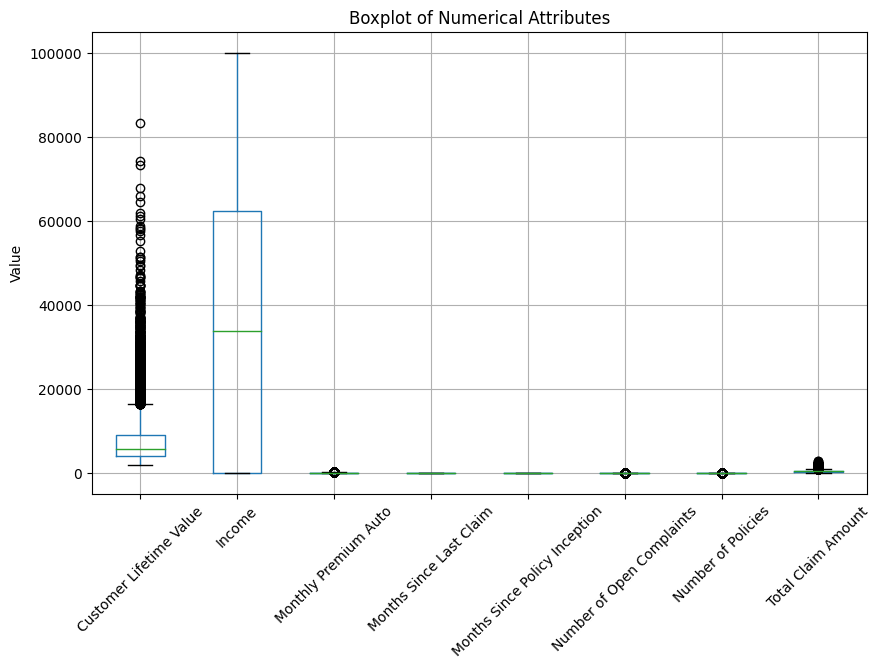

In [ ]:
plt.figure(figsize=(10, 6))
df[num_col].boxplot()
plt.title('Boxplot of Numerical Attributes')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

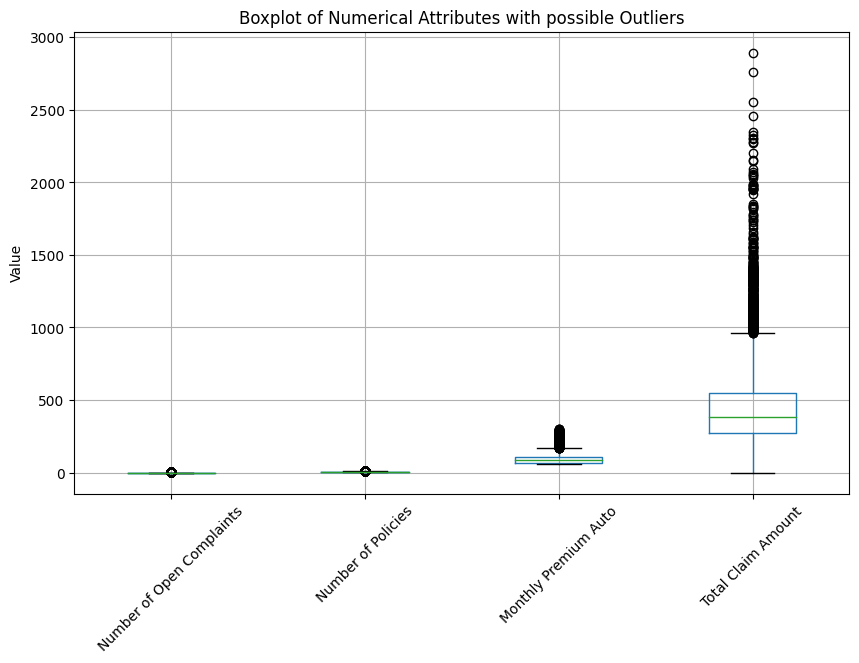

In [ ]:
outlier_col = [ 'Number of Open Complaints', 'Number of Policies','Monthly Premium Auto', 'Total Claim Amount']
plt.figure(figsize=(10, 6))
df[outlier_col].boxplot()
plt.title('Boxplot of Numerical Attributes with possible Outliers')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

## Exploratory Data Analysis

In [ ]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical =  df.select_dtypes(include=['number'])

In [ ]:
df_categorical.describe().T

count unique            top  freq
Customer          9134   9134        BU79786     1
State             9134      5     California  3150
Response          9134      2             No  7826
Coverage          9134      3          Basic  5568
Education         9134      5       Bachelor  2748
EmploymentStatus  9134      5       Employed  5698
Gender            9134      2              F  4658
Location Code     9134      3       Suburban  5779
Marital Status    9134      3        Married  5298
Policy Type       9134      3  Personal Auto  6788
Policy            9134      9    Personal L3  3426
Renew Offer Type  9134      4         Offer1  3752
Sales Channel     9134      4          Agent  3477
Vehicle Class     9134      6  Four-Door Car  4621
Vehicle Size      9134      3        Medsize  6424

In [ ]:
df_categorical['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [ ]:
temp = df_categorical[df_categorical['Response']=='Yes']

In [ ]:
temp.groupby('State')['Response'].count()

State
Arizona       243
California    456
Nevada        124
Oregon        376
Washington    109
Name: Response, dtype: int64

In [ ]:
df_numerical.describe().T

count          mean           std  \
Customer Lifetime Value        9134.0   8004.940475   6870.967608   
Income                         9134.0  37657.380009  30379.904734   
Monthly Premium Auto           9134.0     93.219291     34.407967   
Months Since Last Claim        9134.0     15.097000     10.073257   
Months Since Policy Inception  9134.0     48.064594     27.905991   
Number of Open Complaints      9134.0      0.384388      0.910384   
Number of Policies             9134.0      2.966170      2.390182   
Total Claim Amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
Customer Lifetime Value        1898.007675  3994.251794   5780.182197   
Income                            0.000000     0.000000  33889.500000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since Policy Inception     0.000000    24.000000     48.000000   
Number of Open Complaints         0.000000     0.000000      0.000000   
Number of Policies                1.000000     1.000000      2.000000   
Total Claim Amount                0.099007   272.258244    383.945434   

                                        75%           max  
Customer Lifetime Value         8962.167041  83325.381190  
Income                         62320.000000  99981.000000  
Monthly Premium Auto             109.000000    298.000000  
Months Since Last Claim           23.000000     35.000000  
Months Since Policy Inception     71.000000     99.000000  
Number of Open Complaints          0.000000      5.000000  
Number of Policies                 4.000000      9.000000  
Total Claim Amount               547.514839   2893.239678

In [ ]:
import seaborn as sns
from scipy import stats

In [ ]:
corr_coef, p = stats.pearsonr(df['Monthly Premium Auto'],df['Total Claim Amount'])
print("Pearson Coefficient: ", corr_coef, "p-value", p)

Pearson Coefficient:  0.6320166625194119 p-value 0.0


<Axes: >

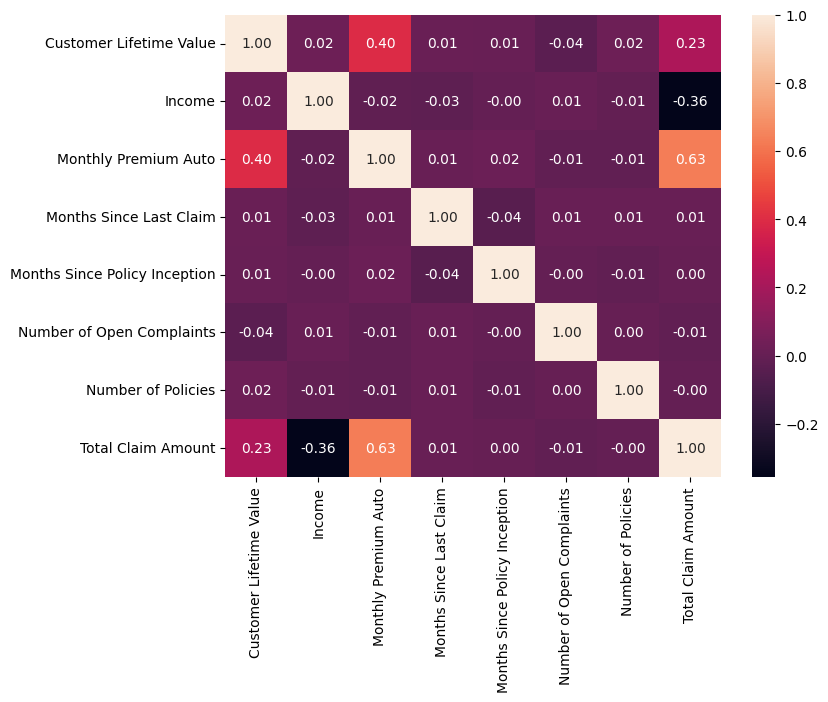

In [ ]:
corr_matrix = df_numerical.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f')

<Axes: >

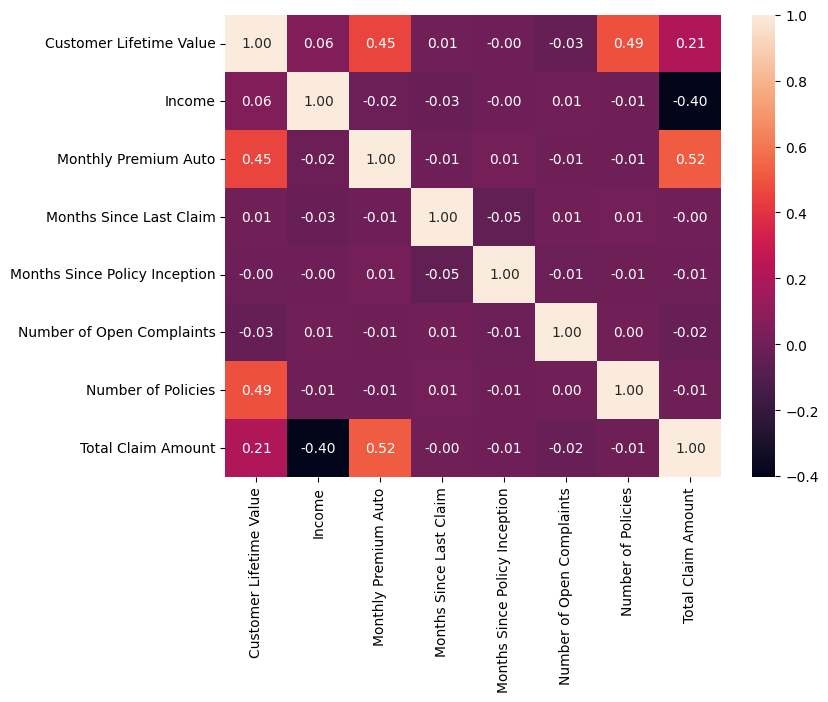

In [ ]:
spearm_corr_matrix = df_numerical.corr(method = 'spearman')
plt.figure(figsize = (8,6))
sns.heatmap(spearm_corr_matrix, annot = True, fmt = '.2f')

In [ ]:
corr_coef_sp, p_sp = stats.spearmanr(df['Monthly Premium Auto'],df['Total Claim Amount'])
print("Spearman Coefficient: ", corr_coef_sp, "p-value", p_sp)

Spearman Coefficient:  0.5222612335718811 p-value 0.0


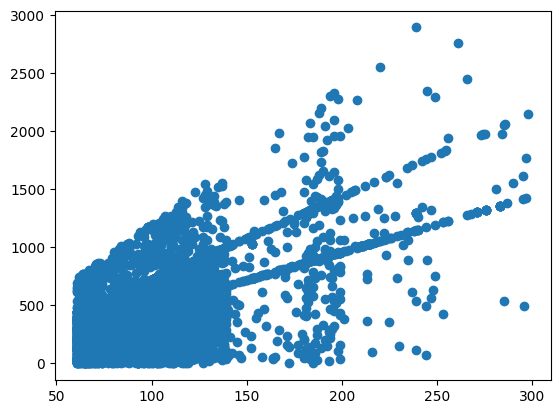

In [ ]:
plt.scatter(df['Monthly Premium Auto'],df['Total Claim Amount'])

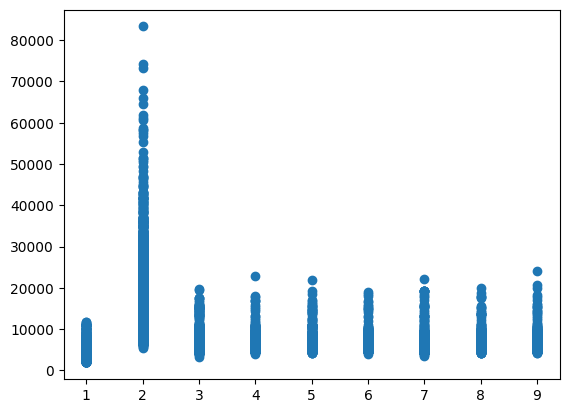

In [ ]:
plt.scatter(df['Number of Policies'],df['Customer Lifetime Value']) #Why?

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64


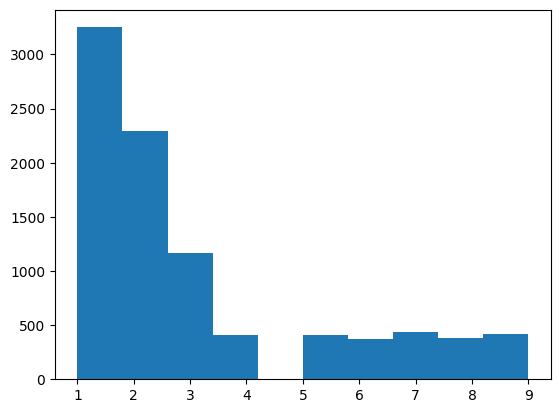

In [ ]:
print(df['Number of Policies'].value_counts())
plt.hist(df['Number of Policies']);

## Probability Distribution

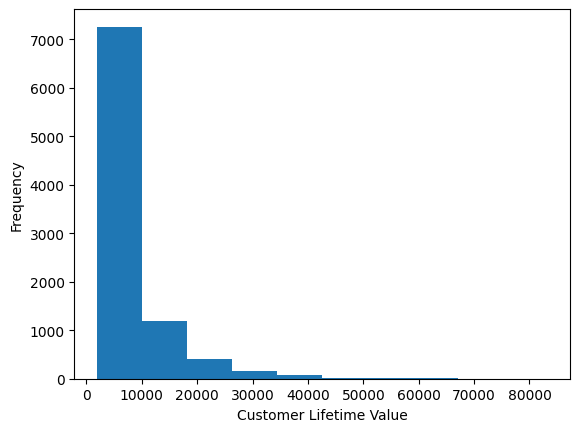

In [ ]:
plt.hist(df['Customer Lifetime Value'])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Frequency");

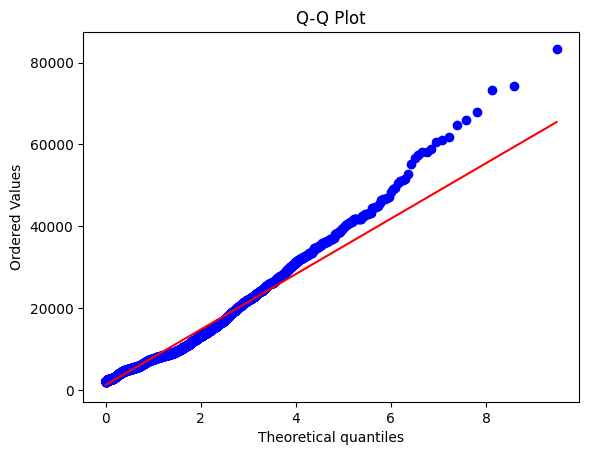

In [ ]:
stats.probplot(df['Customer Lifetime Value'], plot = plt, dist='expon');
plt.title("Q-Q Plot");

In [ ]:
from scipy.stats import expon, kstest
import numpy as np

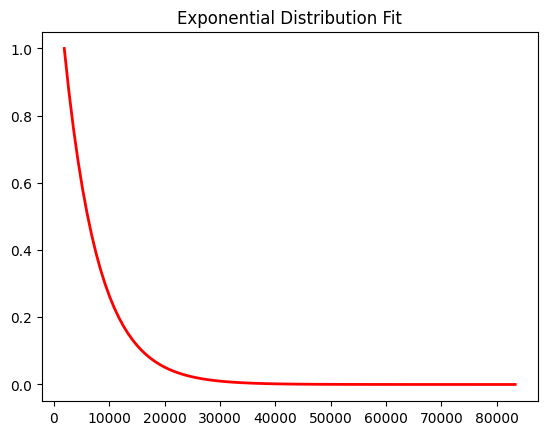

In [ ]:
loc, scale = expon.fit(df['Customer Lifetime Value'])
x = np.linspace(min(df['Customer Lifetime Value']), max(df['Customer Lifetime Value']), 100)
#plt.hist(df['Customer Lifetime Value'])
plt.plot(x, scale*expon.pdf(x, loc=loc, scale=scale), 'r-', lw=2, label='Exponential distribution fit')
plt.title("Exponential Distribution Fit");

In [ ]:
loc

1898.007675

In [ ]:
max(df['Customer Lifetime Value'])

83325.38119

##Hypothesis Testing:
Null Hypothesis : The data is Normally distibuted <br>
Alternate Hypothesis : the data is not normally distributed
 <br> <br>



In [ ]:
import scipy.stats as stats

In [ ]:
stats.shapiro(df['Customer Lifetime Value'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

<b> Identifying the test </b>
*   ANOVA
*   TTEST/Manwhiteneyy

In [ ]:
df_categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
# Initialize lists to store column names for ANOVA and Mann-Whitney U test
columns_anova = []
columns_mannwhitney = []

# Iterate through categorical columns in the DataFrame
for column in df_categorical:
    # Check if the column has more than 2 unique values for ANOVA
    if df[column].nunique() > 2:
        columns_anova.append(column)
    # Otherwise, consider it for Mann-Whitney U test
    else:
        columns_mannwhitney.append(column)

# Print the lists of columns for ANOVA and Mann-Whitney U test
print("Columns for ANOVA test:", columns_anova)
print("Columns for Mann-Whitney U test:", columns_mannwhitney)



Columns for ANOVA test: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
Columns for Mann-Whitney U test: ['Response', 'Gender']


**Response column:**

**Hypothesis Testing:**

**Null Hypothesis:** There is no significant difference in the distributions of both populations.

**Alternative Hypothesis:** There is a significant difference in the distributions of both populations.

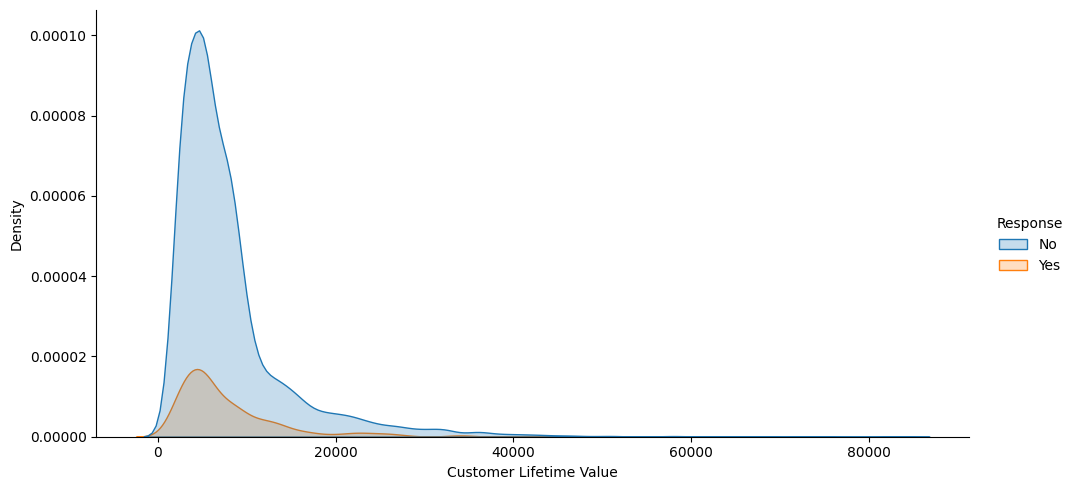

In [ ]:
import seaborn as sns

# Create a kernel density estimate (KDE) plot using seaborn with custom color palette
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Response',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [ ]:
yes = df[df['Response']=='Yes']['Customer Lifetime Value']
no = df[df['Response']=='No']['Customer Lifetime Value']

In [ ]:
mannwhitneyu_test_result = stats.mannwhitneyu(yes,no)
print(mannwhitneyu_test_result)

MannwhitneyuResult(statistic=5060988.0, pvalue=0.5168872245291198)


**Gender column:**

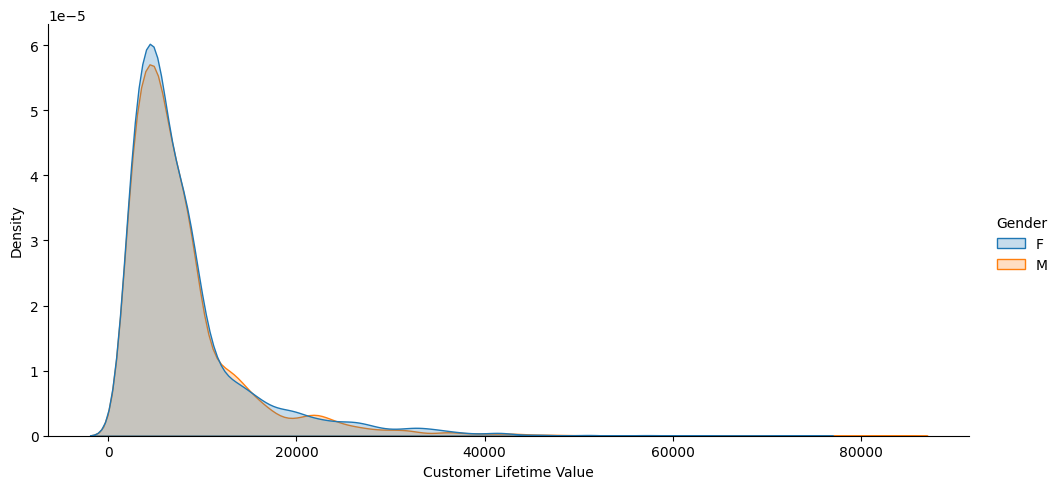

In [ ]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Gender',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

male = df[df['Gender']=='M']['Customer Lifetime Value']
female = df[df['Gender']=='F']['Customer Lifetime Value']

In [ ]:
Gender_test_result = stats.mannwhitneyu(male,female)
print(Gender_test_result)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


**State column:**

**Hypothesis Testing:**

**Null Hypothesis:** The groups have the same mean Ranks.

**Alternative Hypothesis:** The groups do not have the same mean Ranks.

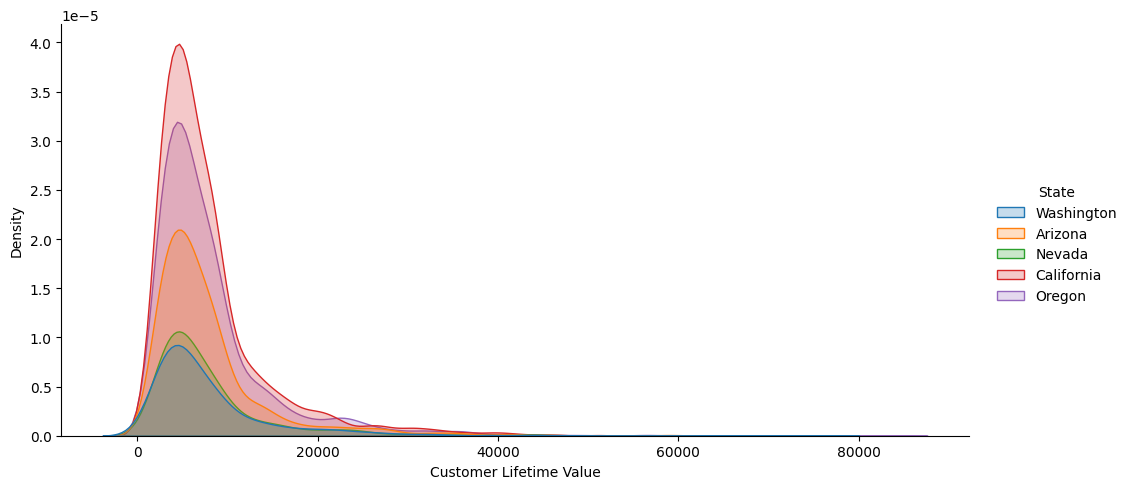

In [ ]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='State',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [ ]:
Or=df[df['State'] == 'Oregon']['Customer Lifetime Value']
ca=df[df['State'] == 'California']['Customer Lifetime Value']
ne=df[df['State'] == 'Nevada']['Customer Lifetime Value']
ar=df[df['State'] == 'Arizona']['Customer Lifetime Value']
wa=df[df['State'] == 'Washington']['Customer Lifetime Value']


In [ ]:
state = stats.kruskal(Or, ca, ar, ne,wa)
state

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)

In [ ]:
anova_state = stats.f_oneway(Or, ca, ar, ne,wa)
anova_state

F_onewayResult(statistic=0.27289285462119306, pvalue=0.8955985932127517)

**Coverage Column**

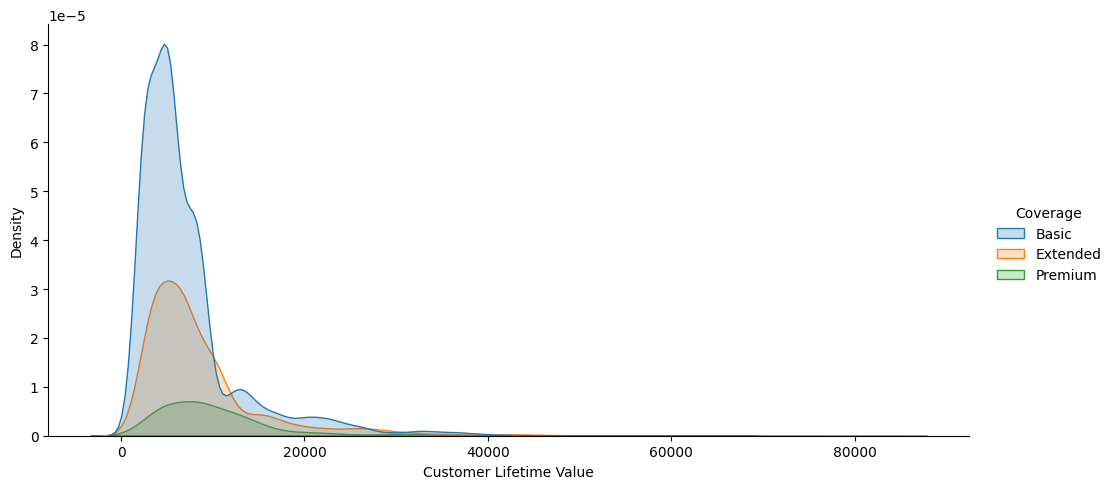

In [ ]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Coverage',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [ ]:
ba=df[df['Coverage'] == 'Basic']['Customer Lifetime Value']
ex=df[df['Coverage'] == 'Extended']['Customer Lifetime Value']
pr = df[df['Coverage']=='Premium']['Customer Lifetime Value']


In [ ]:
coverate_test_result = stats.kruskal(ba,ex,pr)
coverate_test_result

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)

In [ ]:
coverate_test = stats.f_oneway(ba,ex,pr)
coverate_test

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

**Education Column**

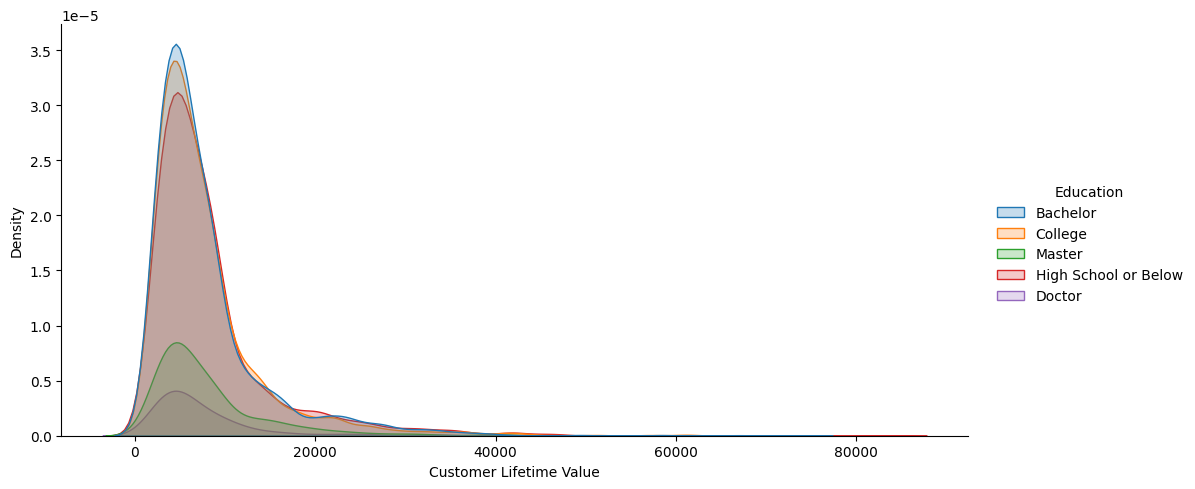

In [ ]:
sns.displot(
    data=df,
    x='Customer Lifetime Value',
    hue='Education',
    kind='kde',
    height=5,
    aspect=2,
    fill=True,
)

In [ ]:
Bachelor=df[df['Education'] == 'Bachelor']['Customer Lifetime Value']
College=df[df['Education'] == 'College']['Customer Lifetime Value']
Master=df[df['Education'] == 'Master']['Customer Lifetime Value']
HighSchool=df[df['Education'] == 'High School or Below']['Customer Lifetime Value']
Doctor =df[df['Education'] == 'Doctor']['Customer Lifetime Value']


In [ ]:
education_test_result = stats.kruskal(Bachelor,College,Master,HighSchool,Doctor)
education_test_result

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)

## Exploratory Data Analysis

## <b> Dataset Summary Statistics</b>

In [ ]:
df_categorical.describe().T

count unique            top  freq
Customer          9134   9134        BU79786     1
State             9134      5     California  3150
Response          9134      2             No  7826
Coverage          9134      3          Basic  5568
Education         9134      5       Bachelor  2748
EmploymentStatus  9134      5       Employed  5698
Gender            9134      2              F  4658
Location Code     9134      3       Suburban  5779
Marital Status    9134      3        Married  5298
Policy Type       9134      3  Personal Auto  6788
Policy            9134      9    Personal L3  3426
Renew Offer Type  9134      4         Offer1  3752
Sales Channel     9134      4          Agent  3477
Vehicle Class     9134      6  Four-Door Car  4621
Vehicle Size      9134      3        Medsize  6424

In [ ]:
df_numerical.describe().T

count          mean           std  \
Customer Lifetime Value        9134.0   8004.940475   6870.967608   
Income                         9134.0  37657.380009  30379.904734   
Monthly Premium Auto           9134.0     93.219291     34.407967   
Months Since Last Claim        9134.0     15.097000     10.073257   
Months Since Policy Inception  9134.0     48.064594     27.905991   
Number of Open Complaints      9134.0      0.384388      0.910384   
Number of Policies             9134.0      2.966170      2.390182   
Total Claim Amount             9134.0    434.088794    290.500092   

                                       min          25%           50%  \
Customer Lifetime Value        1898.007675  3994.251794   5780.182197   
Income                            0.000000     0.000000  33889.500000   
Monthly Premium Auto             61.000000    68.000000     83.000000   
Months Since Last Claim           0.000000     6.000000     14.000000   
Months Since Policy Inception     0.000000    24.000000     48.000000   
Number of Open Complaints         0.000000     0.000000      0.000000   
Number of Policies                1.000000     1.000000      2.000000   
Total Claim Amount                0.099007   272.258244    383.945434   

                                        75%           max  
Customer Lifetime Value         8962.167041  83325.381190  
Income                         62320.000000  99981.000000  
Monthly Premium Auto             109.000000    298.000000  
Months Since Last Claim           23.000000     35.000000  
Months Since Policy Inception     71.000000     99.000000  
Number of Open Complaints          0.000000      5.000000  
Number of Policies                 4.000000      9.000000  
Total Claim Amount               547.514839   2893.239678

## Target Variable analysis

In [ ]:
Target = df['Customer Lifetime Value']
Target.describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

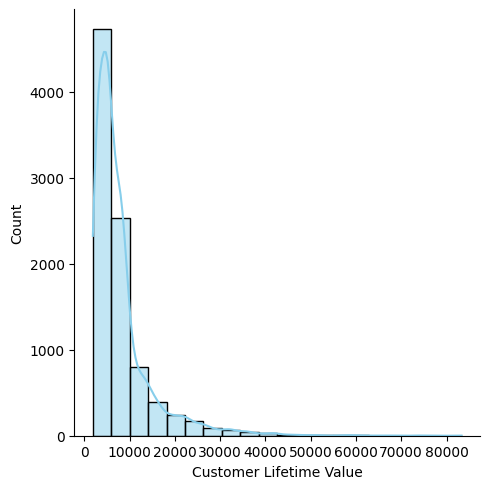

In [ ]:
sns.displot(data=df, x="Customer Lifetime Value", kde=True, color="skyblue", bins=20)


<Axes: xlabel='Customer Lifetime Value'>

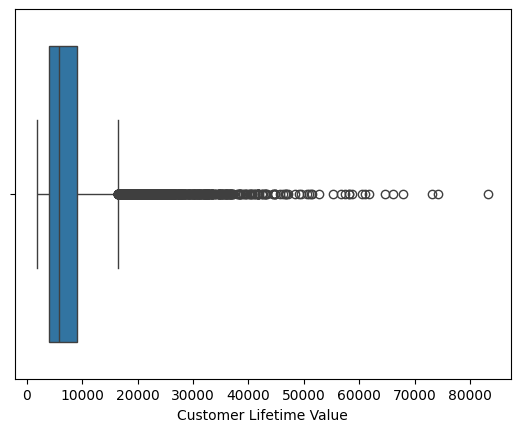

In [ ]:
sns.boxplot(data= df, x="Customer Lifetime Value")


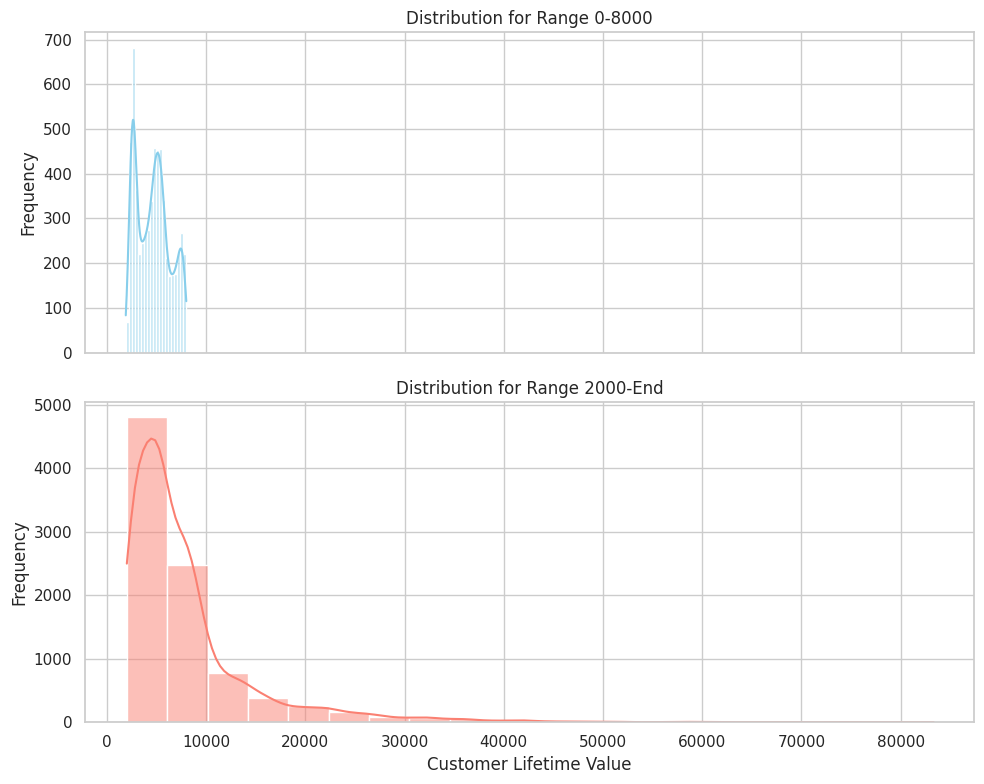

In [ ]:
# Finding the distribution within two different ranges of the Customer Lifetime Value
sns.set(style="whitegrid")

# Define the ranges
range_1 = (0, 8000)
range_2_start = 2000

# Create subsets for each range
subset_1 = df[(df['Customer Lifetime Value'] >= range_1[0]) & (df['Customer Lifetime Value'] <= range_1[1])]
subset_2 = df[df['Customer Lifetime Value'] >= range_2_start]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot distribution for range 1
sns.histplot(data=subset_1, x="Customer Lifetime Value", kde=True, color="skyblue", bins=20, ax=axes[0])
axes[0].set_title(f"Distribution for Range {range_1[0]}-{range_1[1]}")
axes[0].set_xlabel("Customer Lifetime Value")
axes[0].set_ylabel("Frequency")

# Plot distribution for range 2
sns.histplot(data=subset_2, x="Customer Lifetime Value", kde=True, color="salmon", bins=20, ax=axes[1])
axes[1].set_title(f"Distribution for Range {range_2_start}-End")
axes[1].set_xlabel("Customer Lifetime Value")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##Numerical Features Analysis

In [ ]:
df_numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [ ]:
numerical_columns = ['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
           'Months Since Policy Inception', 'Number of Open Complaints',
           'Number of Policies', 'Total Claim Amount']

In [ ]:
# Calculate statistics for each column
statistics = df[numerical_columns].agg(['mean', 'var', 'std', 'skew']).transpose()

# Print the statistics in a tabular format
print("Statistics for specified columns:")
print(statistics.to_string())

Statistics for specified columns:
                                       mean           var           std      skew
Income                         37657.380009  9.229386e+08  30379.904734  0.286887
Monthly Premium Auto              93.219291  1.183908e+03     34.407967  2.123546
Months Since Last Claim           15.097000  1.014705e+02     10.073257  0.278586
Months Since Policy Inception     48.064594  7.787443e+02     27.905991  0.040165
Number of Open Complaints          0.384388  8.287982e-01      0.910384  2.783263
Number of Policies                 2.966170  5.712969e+00      2.390182  1.253333
Total Claim Amount               434.088794  8.439030e+04    290.500092  1.714966


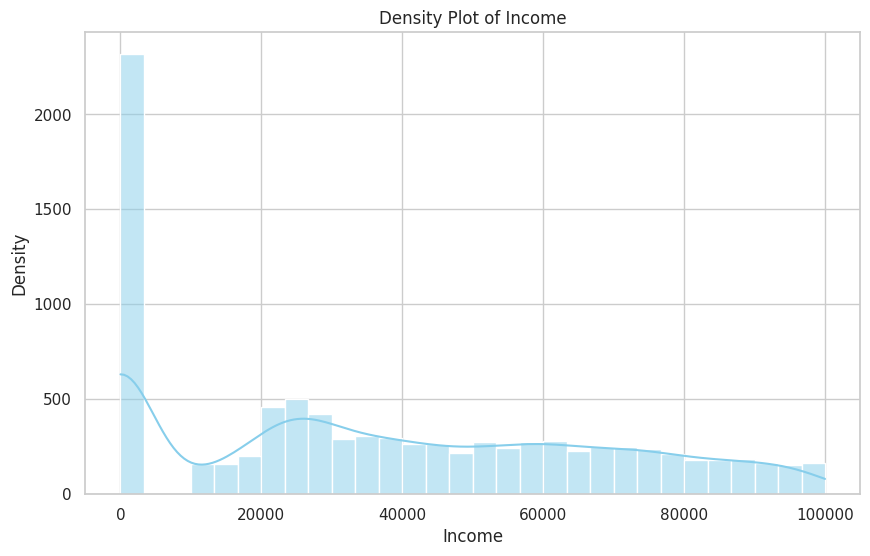

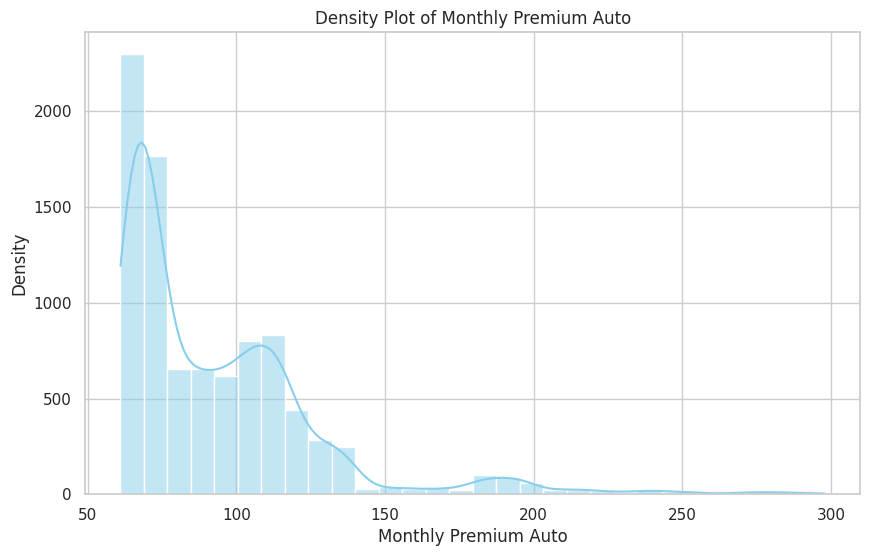

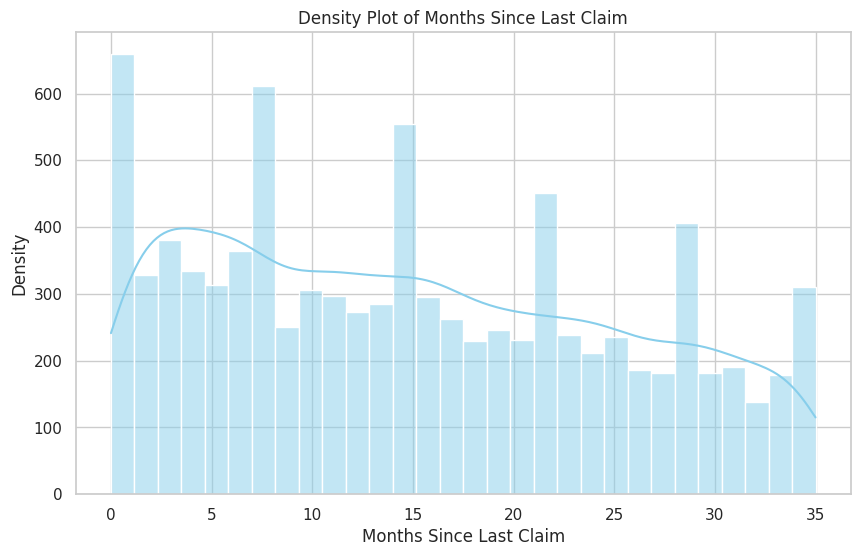

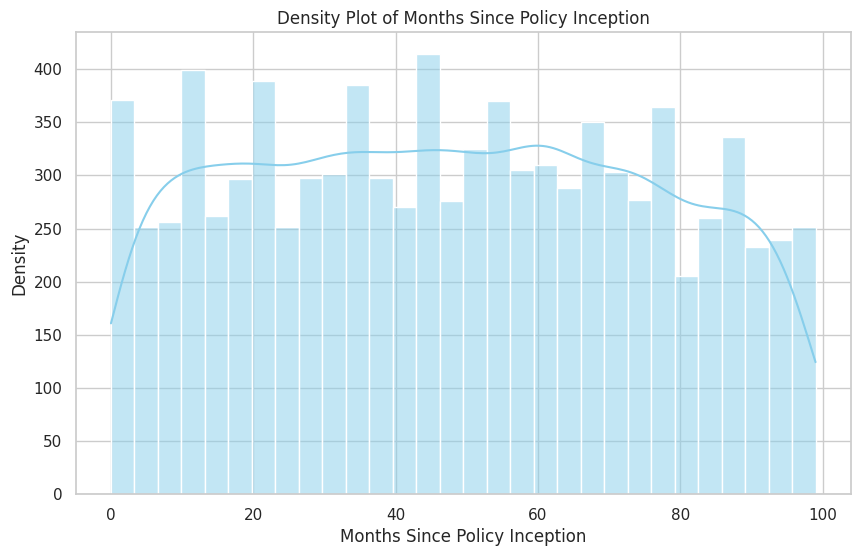

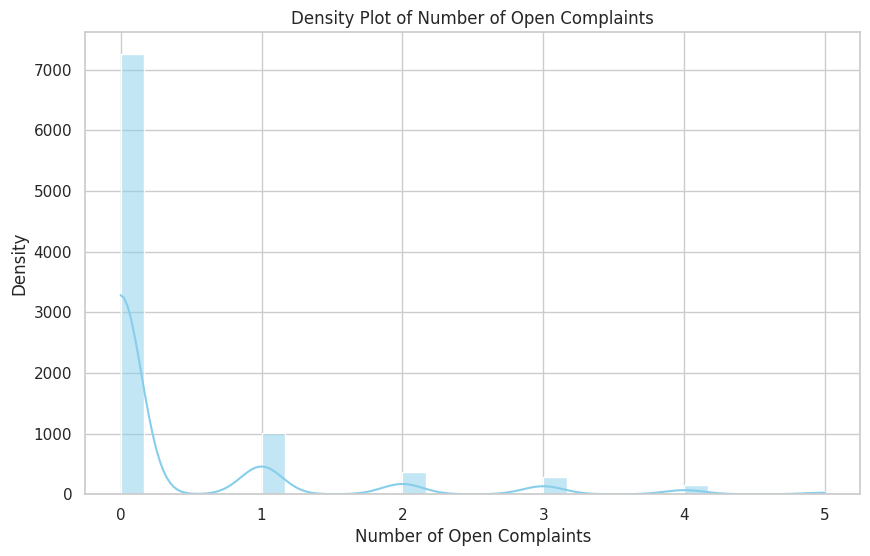

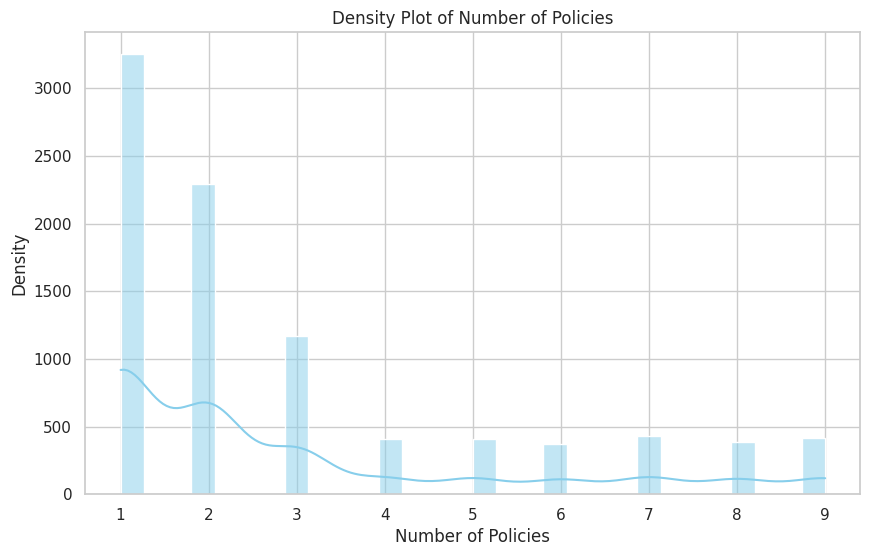

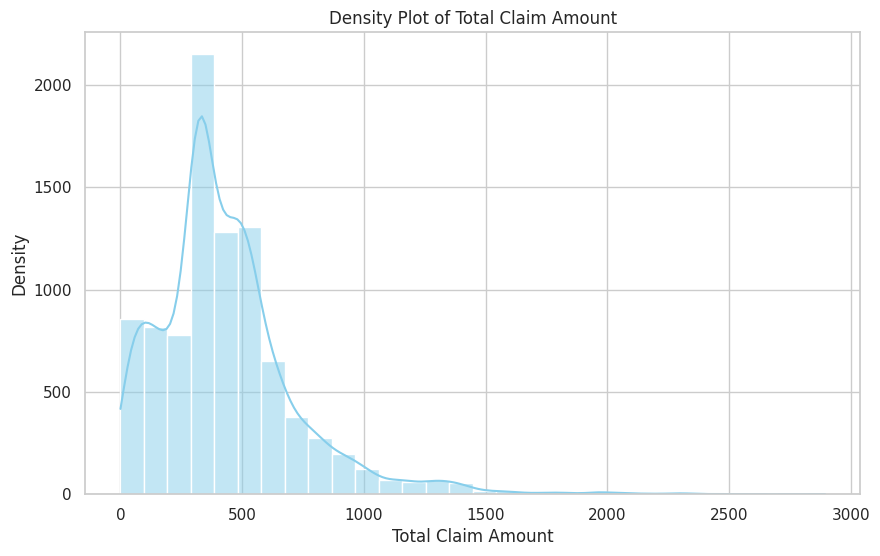

In [ ]:
sns.set(style="whitegrid", palette="pastel")

# Iterate over each numerical column and create a density plot and histogram
for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Density plot
    sns.histplot(df[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

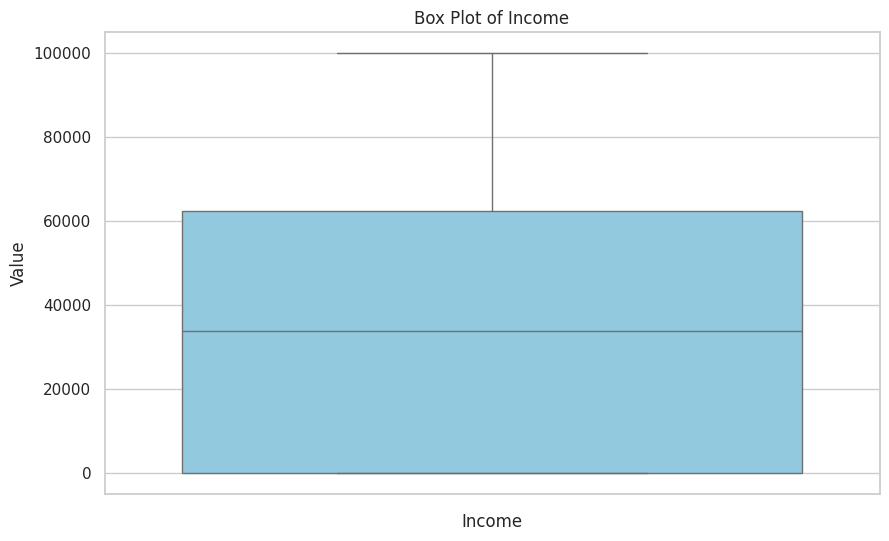

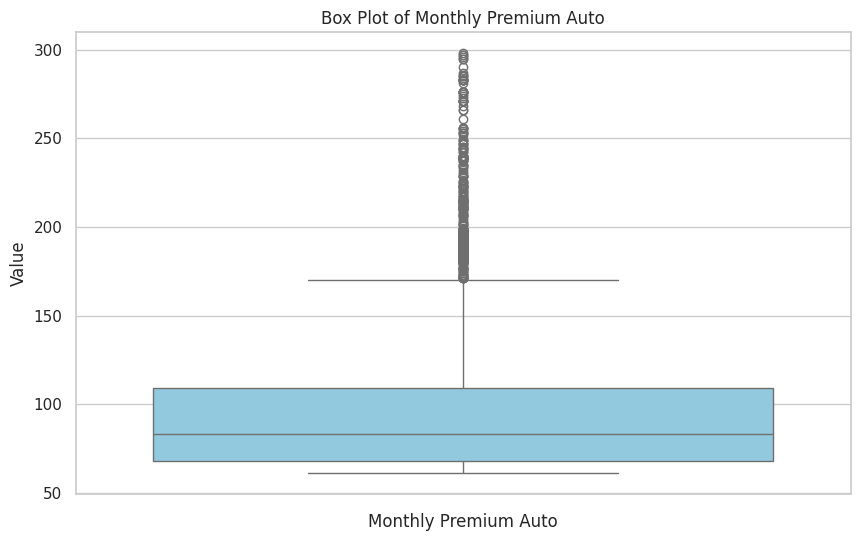

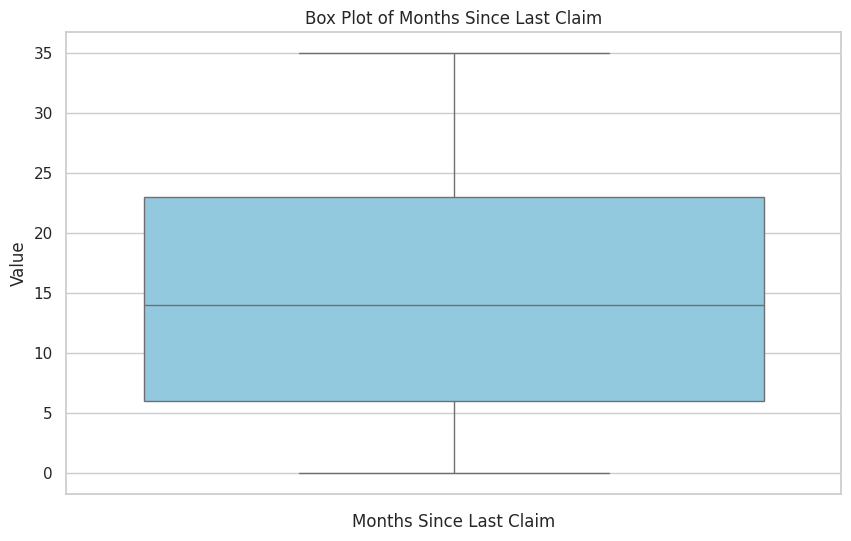

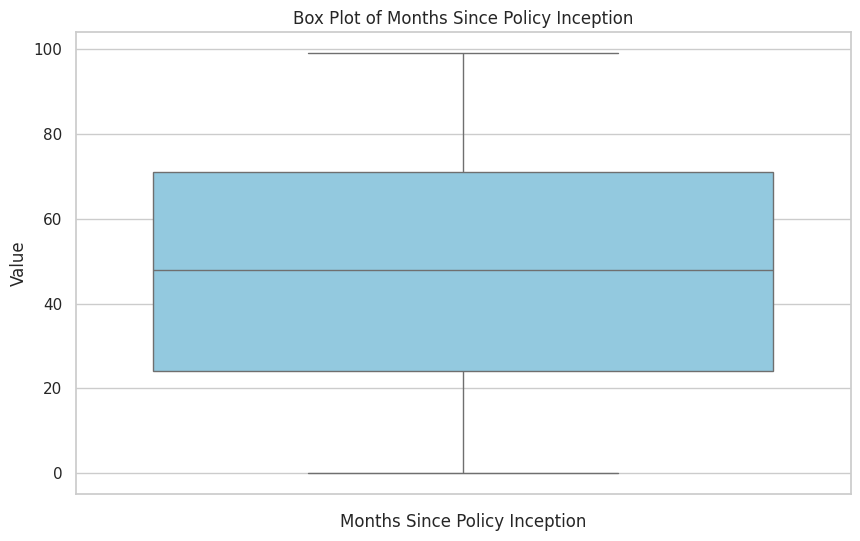

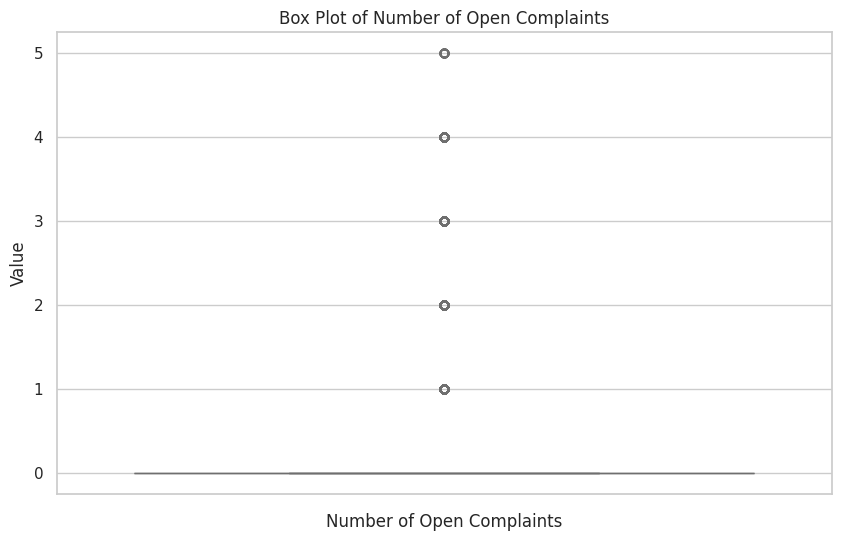

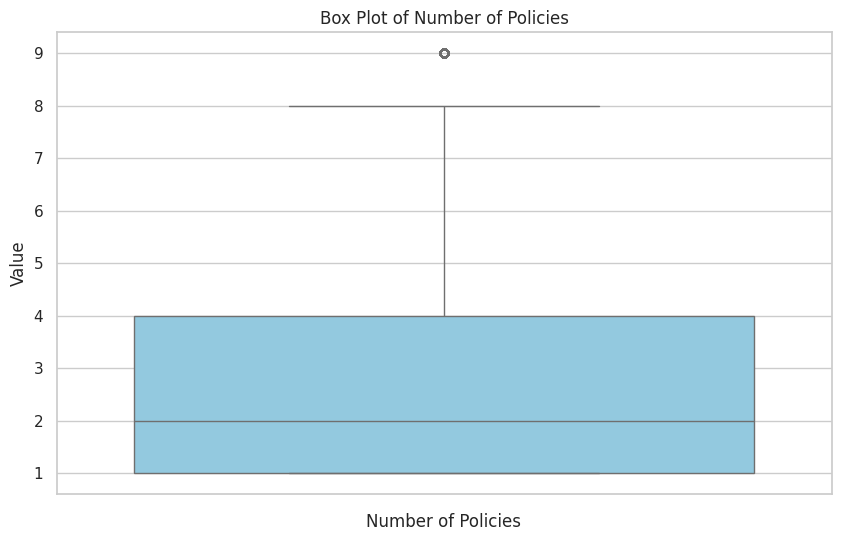

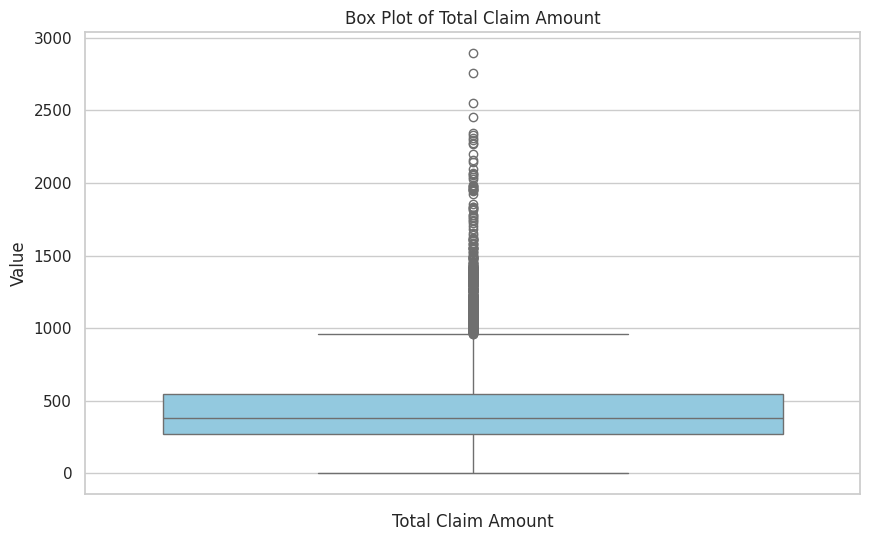

In [ ]:
# Iterate over each numerical column and create a box plot
for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Box plot
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

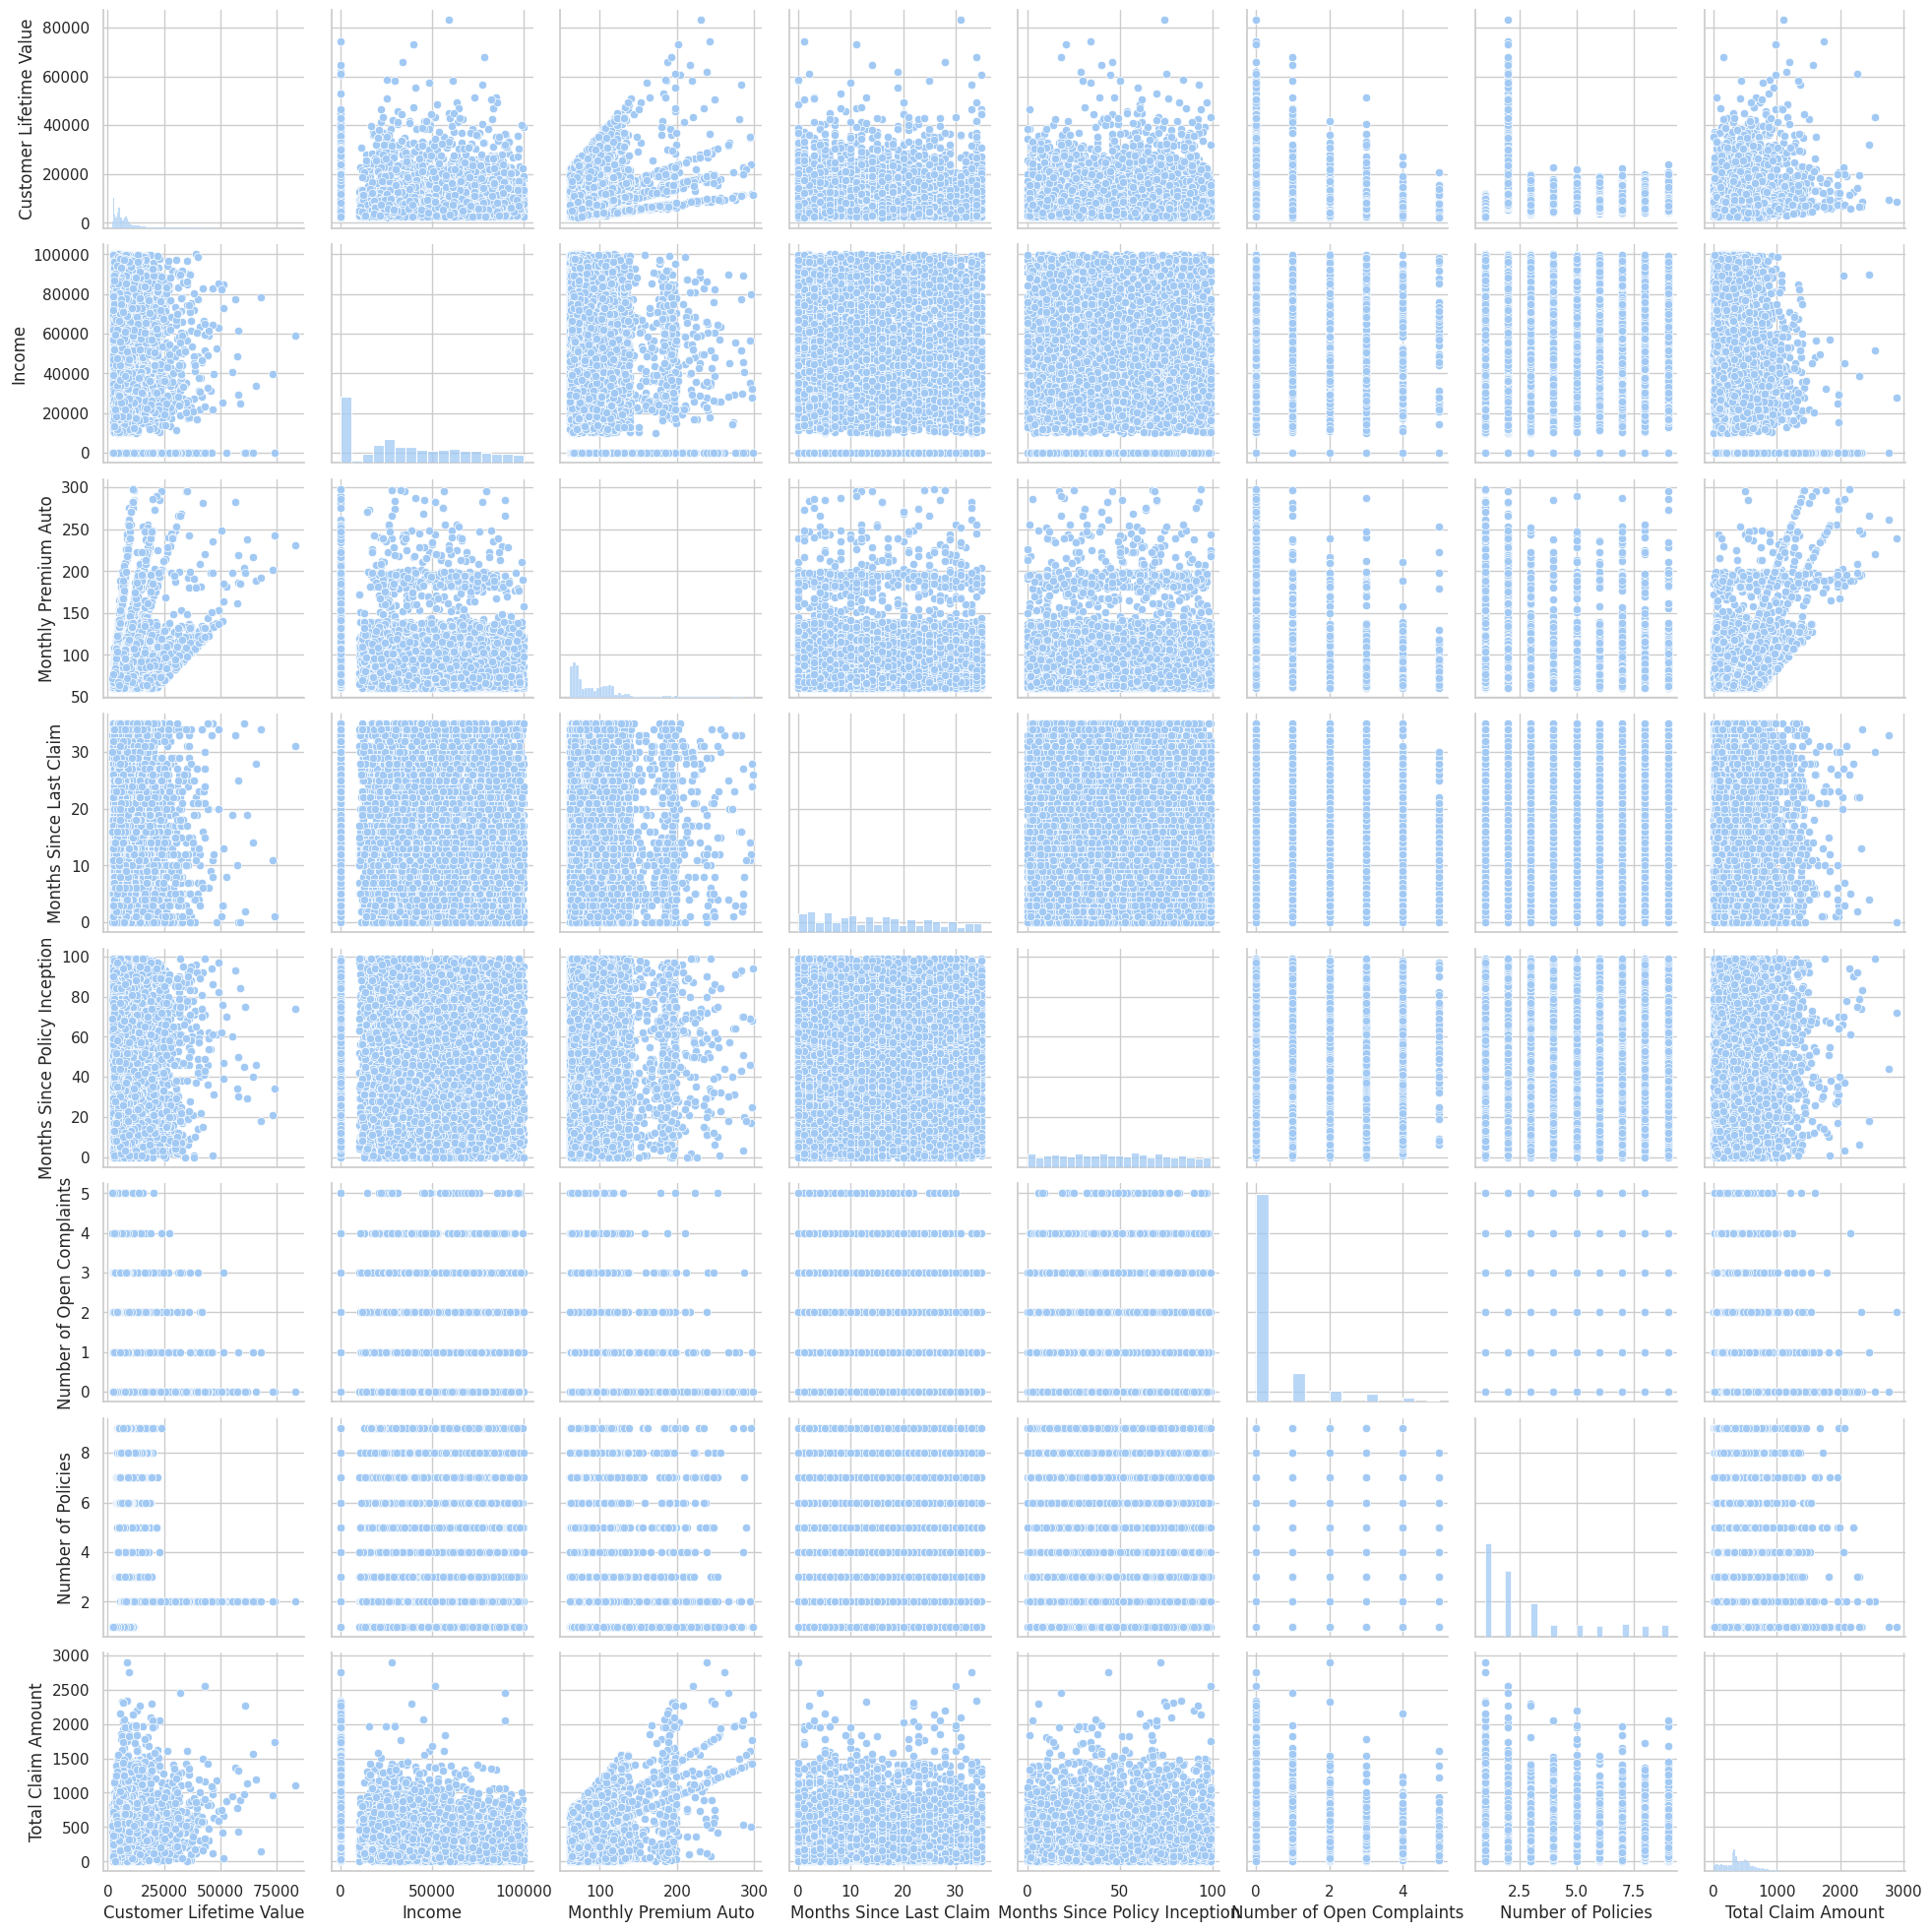

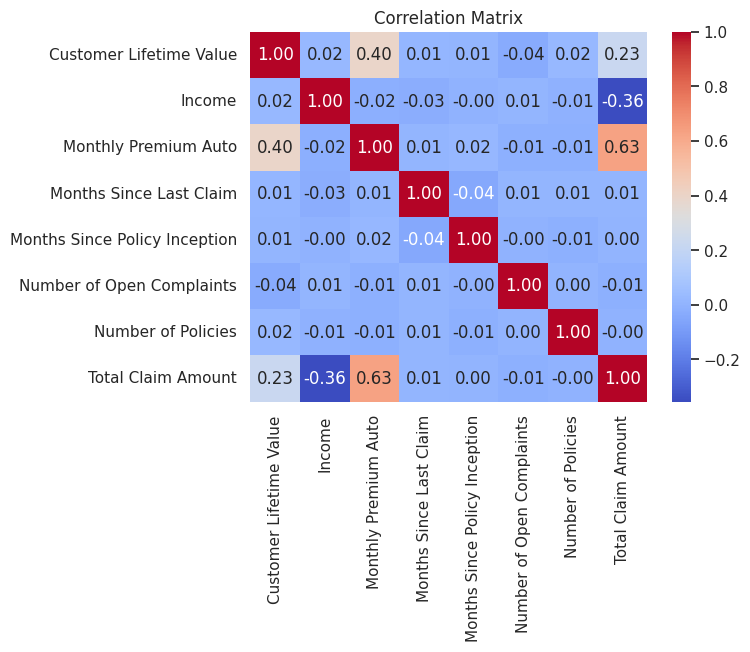

In [ ]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

# Scatter plots for all pairs of numerical variables
sns.pairplot(df[numerical])
plt.show()

# Correlation matrix for all numerical columns
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Average months since last claim
avg_months_since_last_claim = df['Months Since Last Claim'].mean()
print(f"Average Months Since Last Claim: {avg_months_since_last_claim:.2f}")

Average Months Since Last Claim: 15.10


On average, customers tend to make claims within a certain timeframe, with the average months since the last claim representing the typical time elapsed between claims.

In [ ]:
# Average months since policy inception
avg_months_since_policy_inception = df['Months Since Policy Inception'].mean()
print(f"Average Months Since Policy Inception: {avg_months_since_policy_inception:.2f}")


Average Months Since Policy Inception: 48.06


Customers have been with the insurance company for an average duration since policy inception. This metric helps understand the average tenure of customers and their loyalty to the company.

In [ ]:
# Frequency of open complaints
open_complaints_frequency = df['Number of Open Complaints'].value_counts()
print("Frequency of Open Complaints:")
print(open_complaints_frequency)


Frequency of Open Complaints:
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64


The frequency distribution of open complaints among customers reveals the prevalence of different complaint counts. This information is crucial for assessing customer satisfaction and identifying potential areas for improvement in service quality

In [ ]:
# Average number of policies per customer
avg_policies_per_customer = df['Number of Policies'].mean()
print(f"Average Number of Policies per Customer: {avg_policies_per_customer:.2f}")


Average Number of Policies per Customer: 2.97


On average, customers hold a certain number of insurance policies, indicating the level of engagement and coverage preferences among the customer base.

In [ ]:
# Highest number of policies

print("Number of Policies:\n",df['Number of Policies'].value_counts())

Number of Policies:
 1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64




##Categorical Feature Analysis

In [ ]:
df_categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
df_categorical_new = df_categorical.drop('Customer', axis=1)

In [ ]:
df_categorical_new.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
for column in df_categorical_new.columns:
    num_unique_labels = df_categorical_new[column].nunique()
    print(f" '{column}': {num_unique_labels}")

 'State': 5
 'Response': 2
 'Coverage': 3
 'Education': 5
 'EmploymentStatus': 5
 'Gender': 2
 'Location Code': 3
 'Marital Status': 3
 'Policy Type': 3
 'Policy': 9
 'Renew Offer Type': 4
 'Sales Channel': 4
 'Vehicle Class': 6
 'Vehicle Size': 3


<Figure size 1200x800 with 0 Axes>

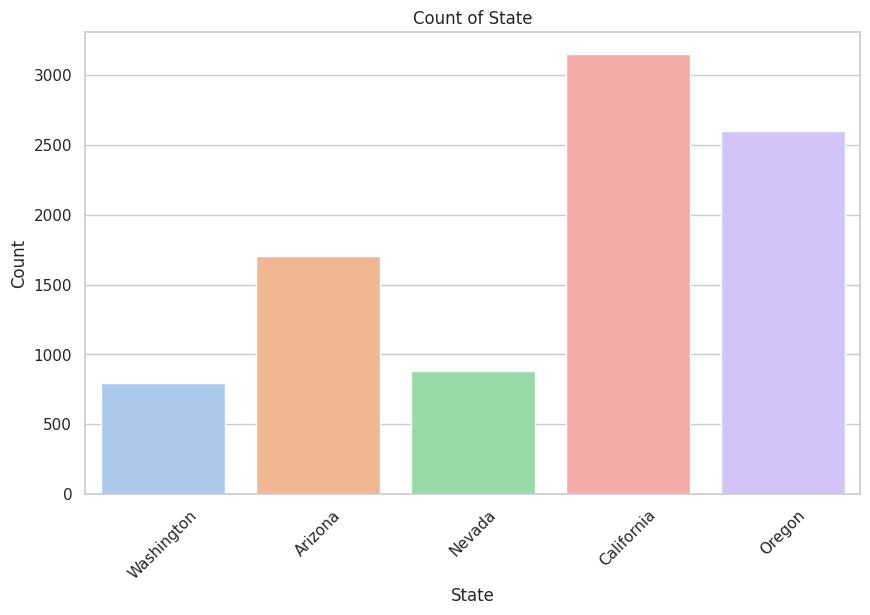

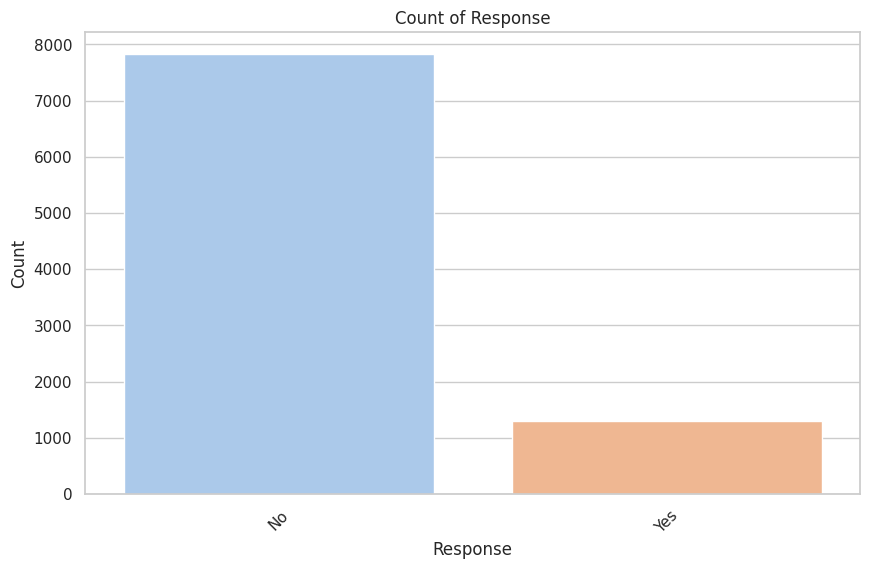

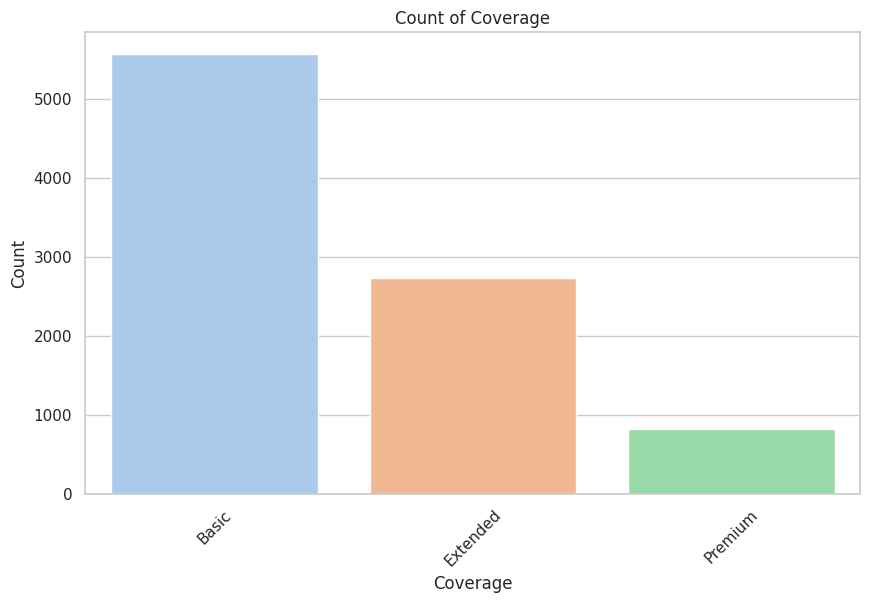

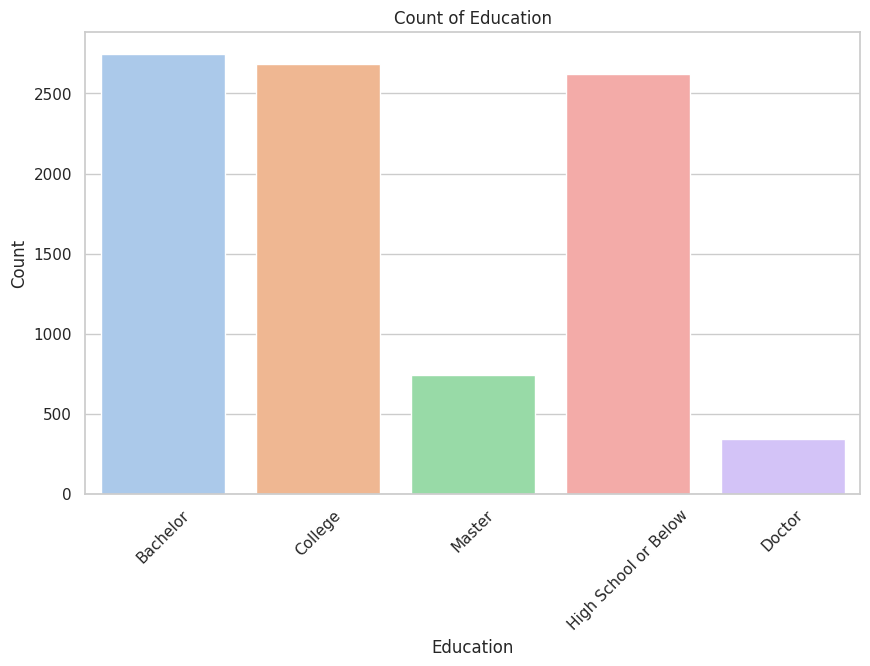

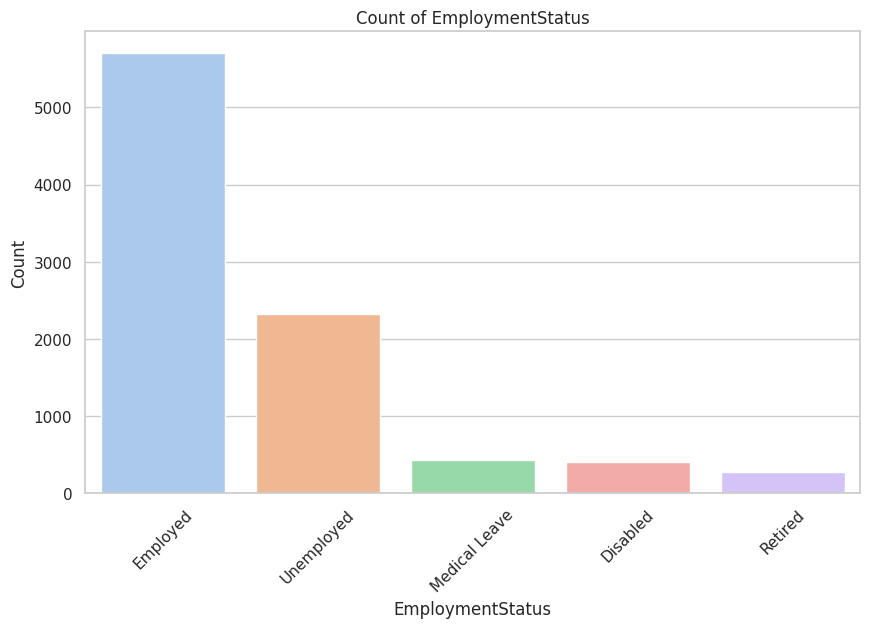

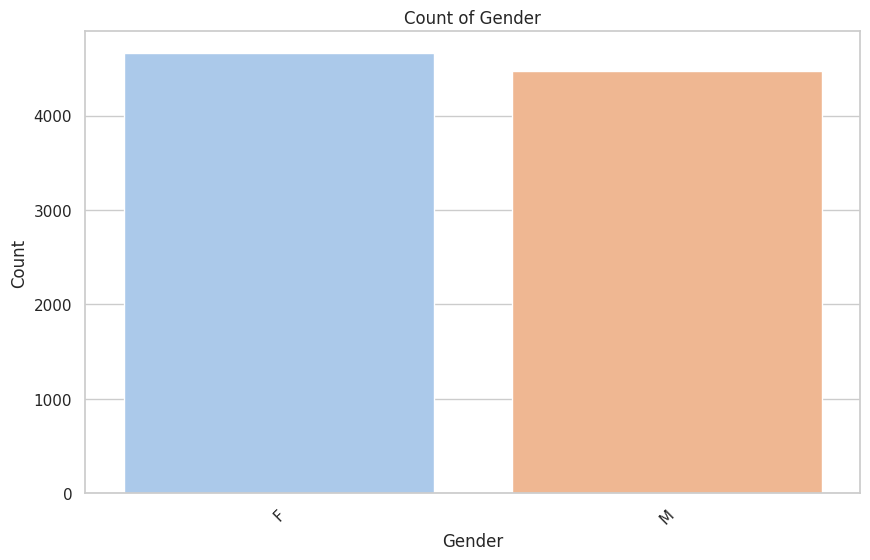

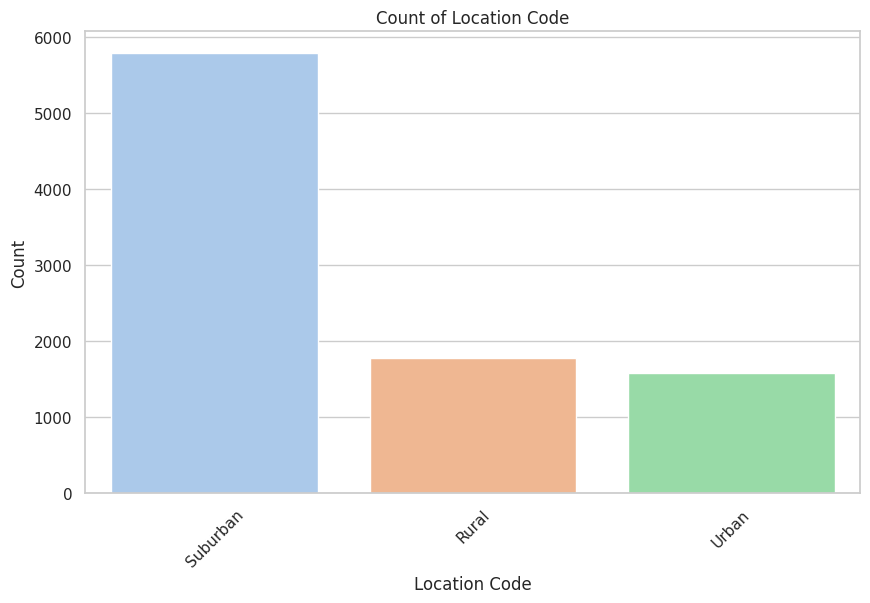

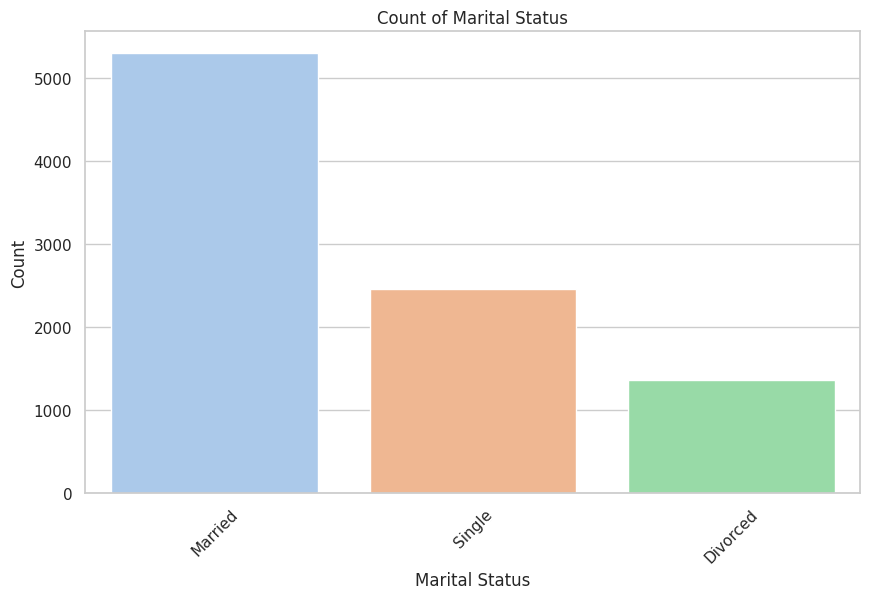

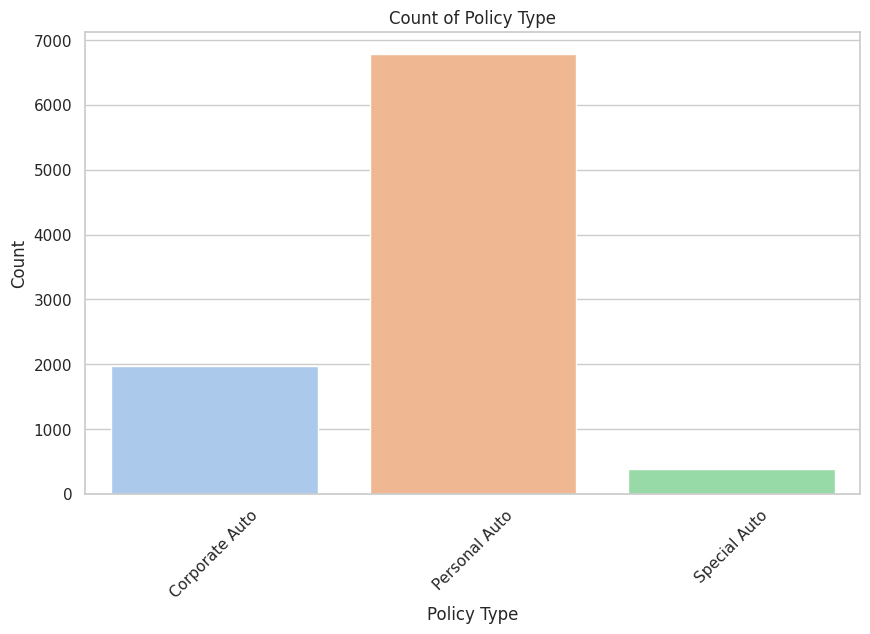

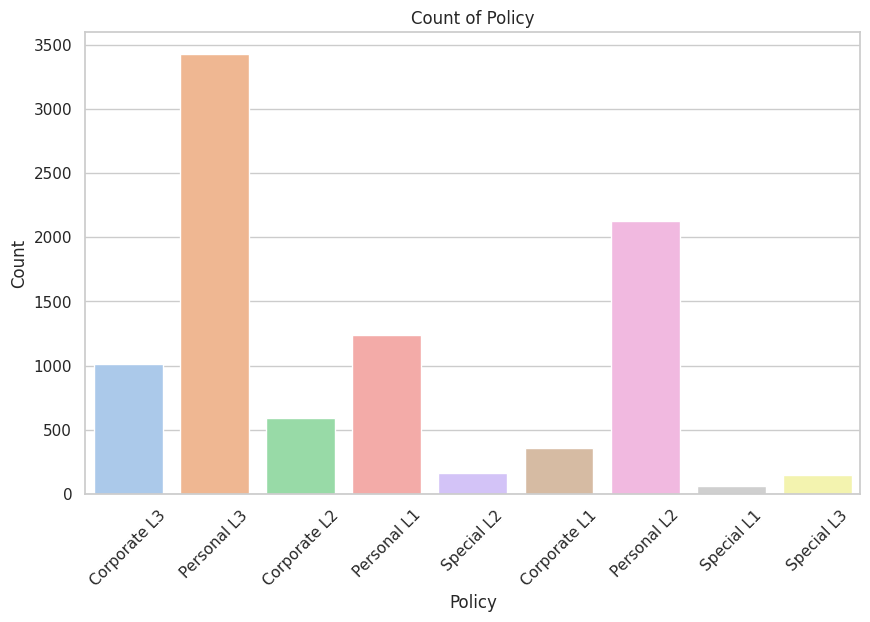

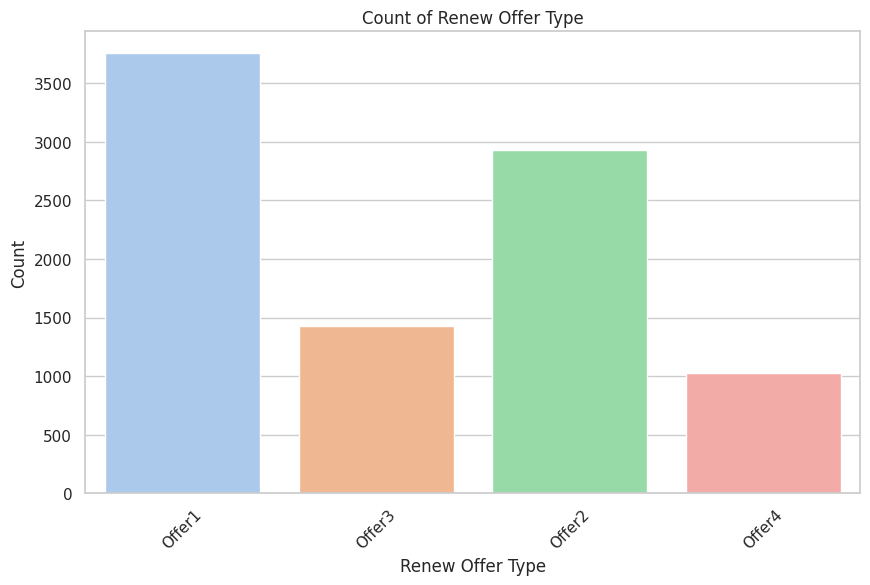

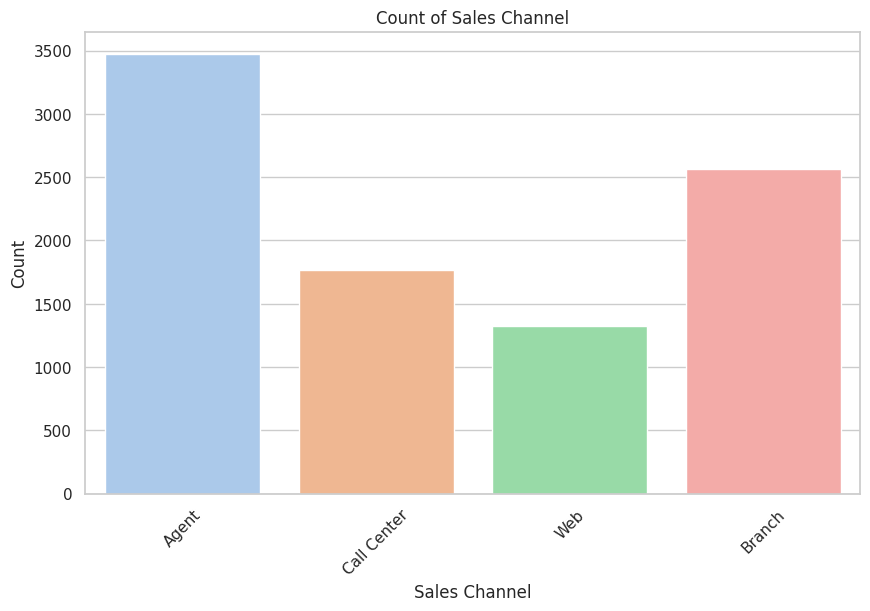

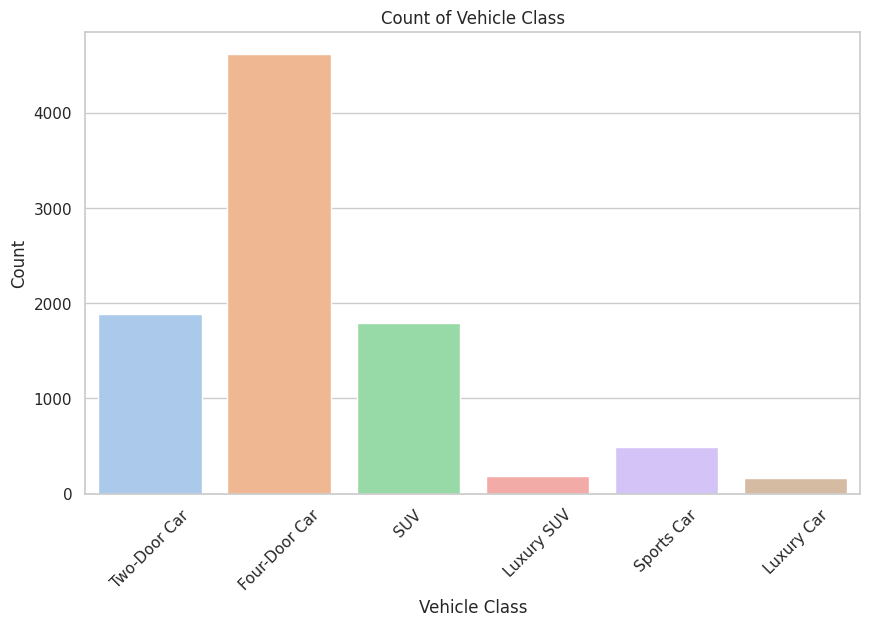

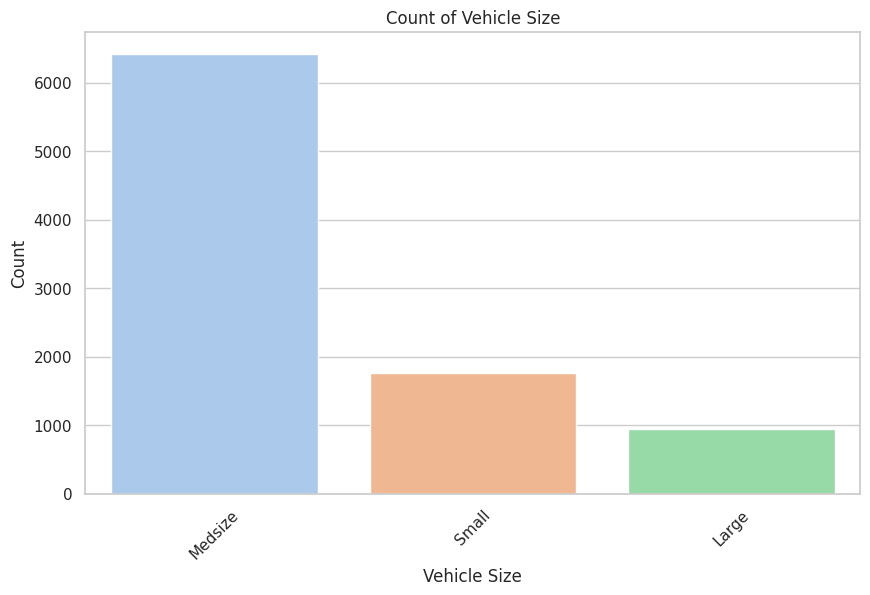

In [ ]:
plt.figure(figsize=(12, 8))

# Iterate over each categorical column and create a bar plot
for column in df_categorical_new.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_categorical_new, palette='pastel', hue = column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))

# # Iterate over each categorical column and create a box plot
# for column in df_categorical.columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=column, y='Customer Lifetime Value', data=df, palette='pastel', hue=column)
#     plt.title(f'Box plot of Customer Lifetime Value with respect to {column}')
#     plt.xlabel(column)
#     plt.ylabel('Customer Lifetime Value')
#     plt.xticks(rotation=45)
#     plt.show()

<Figure size 1200x800 with 0 Axes>

KeyboardInterrupt: 

### Feature Engineering

#### Binning the continuous variables

In [ ]:
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
income_labels = [0,1,2,3,4,5]

premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]

claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]

# Apply binning to the respective variables
df['CLV Category'] = pd.cut(df['Customer Lifetime Value'], bins=CLV_bins, labels=value_labels)
df['Income Category'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)
df['Monthly Premium Category'] = pd.cut(df['Monthly Premium Auto'], bins=premium_bins, labels=premium_labels)
df['Total Claim Amount Category'] = pd.cut(df['Total Claim Amount'], bins=claim_bins, labels=claim_labels)

# Display the resulting DataFrame
print(df.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...        Policy  \
0        2011-02-24         Employed      F   56274  ...  Corporate L3   
1        2011-01-31       Unemployed      F       0  ...   Personal L3   
2        2011-02-19         Employed      F   48767  ...   Personal L3   
3        2011-01-20       Unemployed      M       0  ...  Corporate L2   
4        2011-02-03         Employed      M   43836  ...   Personal L1   

  Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0 

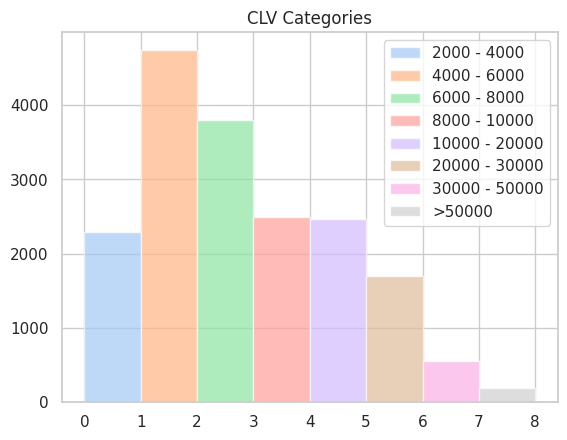

In [ ]:
label_clv = ['2000 - 4000', '4000 - 6000', '6000 - 8000', '8000 - 10000', '10000 - 20000', '20000 - 30000', '30000 - 50000', '>50000']
value_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
CLV_bins = [0,2000, 4000, 6000, 8000, 10000, 20000, 30000, 50000,90000]
for i in range(len(value_labels)-1):
    plt.hist(df['CLV Category'], bins=value_labels[i:i+2], alpha=0.7, label=label_clv[i])
plt.legend()
plt.title("CLV Categories");

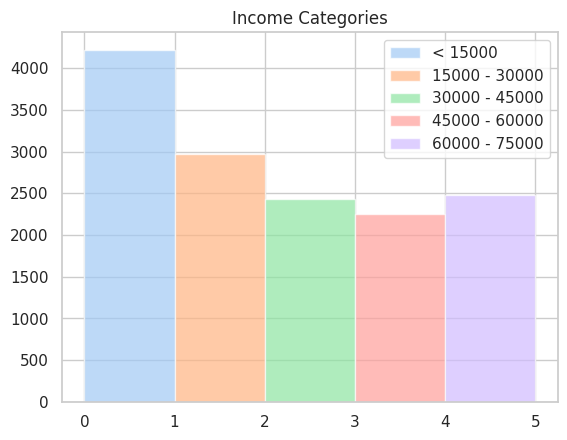

In [ ]:
income_labels = [0,1,2,3,4,5]
income_bins = [ -1,15000, 30000, 45000, 60000, 75000, 100000]
labels_income = ['< 15000', '15000 - 30000', '30000 - 45000', '45000 - 60000', '60000 - 75000', '75000 - 100000']
for i in range(len(income_labels)-1):
    plt.hist(df['Income Category'], bins=income_labels[i:i+2], alpha=0.7, label=labels_income[i])
plt.legend()
plt.title("Income Categories");

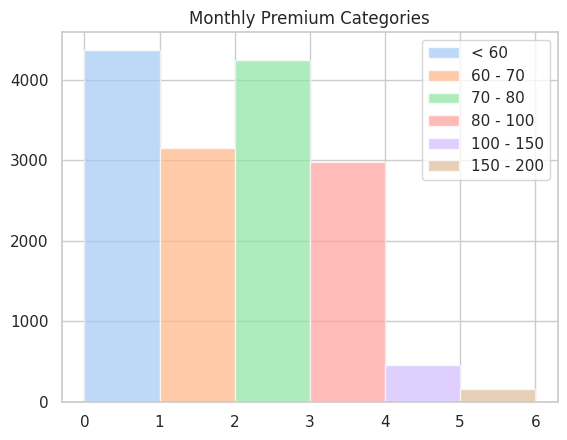

In [ ]:
premium_bins = [60, 70, 80, 100, 150, 200, 250, 300]
premium_labels = [0,1,2,3,4,5,6]
labels_premium = ['< 60', '60 - 70', '70 - 80', '80 - 100', '100 - 150', '150 - 200', '200 - 250', '250 - 300']
for i in range(len(premium_labels)-1):
    plt.hist(df['Monthly Premium Category'], bins=premium_labels[i:i+2], alpha=0.7, label=labels_premium[i])
plt.legend()
plt.title("Monthly Premium Categories");

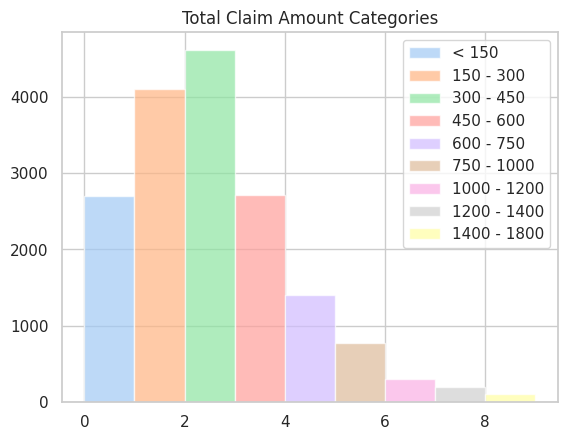

In [ ]:
claim_bins = [0, 150, 300, 450, 600, 750, 1000, 1200, 1400, 1800, 3000]
claim_labels = [0,1,2,3,4,5,6,7,8,9]
labels_claim = ['< 150', '150 - 300', '300 - 450', '450 - 600', '600 - 750', '750 - 1000','1000 - 1200', '1200 - 1400', '1400 - 1800', '> 1800']
for i in range(len(claim_labels)-1):
    plt.hist(df['Total Claim Amount Category'], bins=claim_labels[i:i+2], alpha=0.7, label=labels_claim[i])
plt.legend()
plt.title("Total Claim Amount Categories");

#### Encoding the Categorical Variables

In [ ]:
df_temp = df[['CLV Category', 'Income Category','Monthly Premium Category','Total Claim Amount Category']]
df_temp.head()

CLV Category Income Category Monthly Premium Category  \
0            1               3                        0   
1            3               0                        2   
2            5               3                        3   
3            3               0                        3   
4            1               2                        1   

  Total Claim Amount Category  
0                           2  
1                           6  
2                           3  
3                           3  
4                           0

In [ ]:
df_new = pd.concat([df_categorical_new, df_temp], axis = 1)

In [ ]:
df_new.head()

State Response  Coverage Education EmploymentStatus Gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  Location Code Marital Status     Policy Type        Policy Renew Offer Type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  Sales Channel  Vehicle Class Vehicle Size CLV Category Income Category  \
0         Agent   Two-Door Car      Medsize            1               3   
1         Agent  Four-Door Car      Medsize            3               0   
2         Agent   Two-Door Car      Medsize            5               3   
3   Call Center            SUV      Medsize            3               0   
4         Agent  Four-Door Car      Medsize            1               2   

  Monthly Premium Category Total Claim Amount Category  
0                        0                           2  
1                        2                           6  
2                        3                           3  
3                        3                           3  
4                        1                           0

In [ ]:
categorical = df_new.columns.to_list()
categorical

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'CLV Category',
 'Income Category',
 'Monthly Premium Category',
 'Total Claim Amount Category']

In [ ]:
df_encoded = pd.get_dummies(df_new, columns=categorical)
df_encoded.head()

State_Arizona  State_California  State_Nevada  State_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   State_Washington  Response_No  Response_Yes  Coverage_Basic  \
0                 1            1             0               1   
1                 0            1             0               0   
2                 0            1             0               0   
3                 0            1             0               1   
4                 1            1             0               1   

   Coverage_Extended  Coverage_Premium  ...  Total Claim Amount Category_0  \
0                  0                 0  ...                              0   
1                  1                 0  ...                              0   
2                  0                 1  ...                              0   
3                  0                 0  ...                              0   
4                  0                 0  ...                              1   

   Total Claim Amount Category_1  Total Claim Amount Category_2  \
0                              0                              1   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Total Claim Amount Category_3  Total Claim Amount Category_4  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   Total Claim Amount Category_5  Total Claim Amount Category_6  \
0                              0                              0   
1                              0                              1   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Total Claim Amount Category_7  Total Claim Amount Category_8  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Total Claim Amount Category_9  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 89 columns]

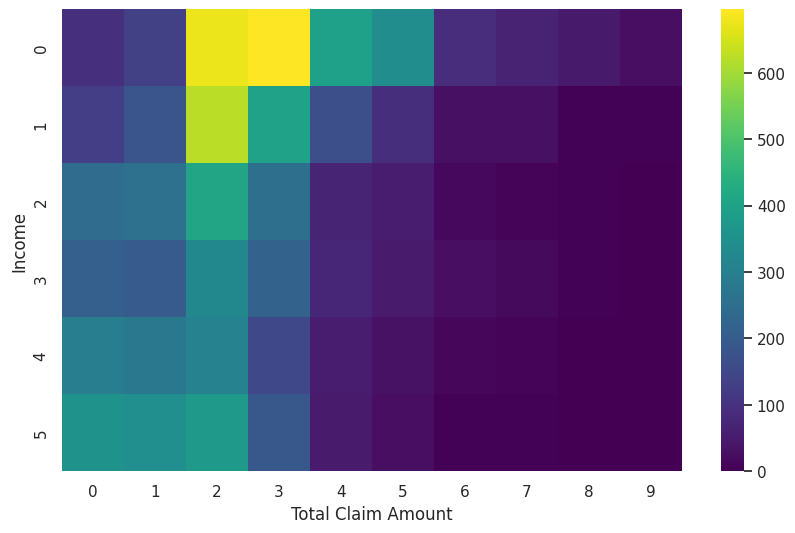

In [ ]:
plt.subplots(figsize=(10, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Income')

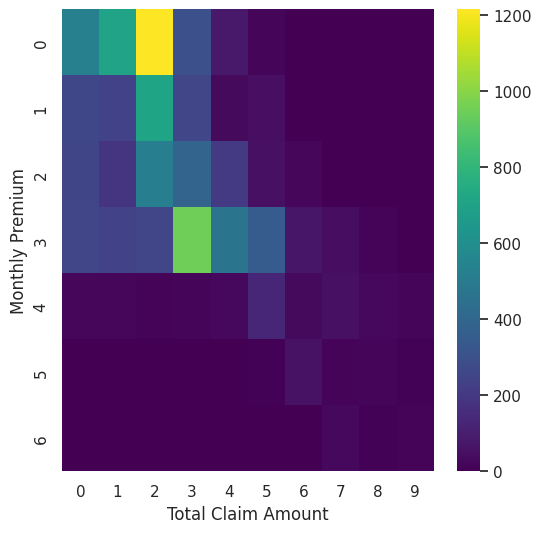

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Monthly Premium')

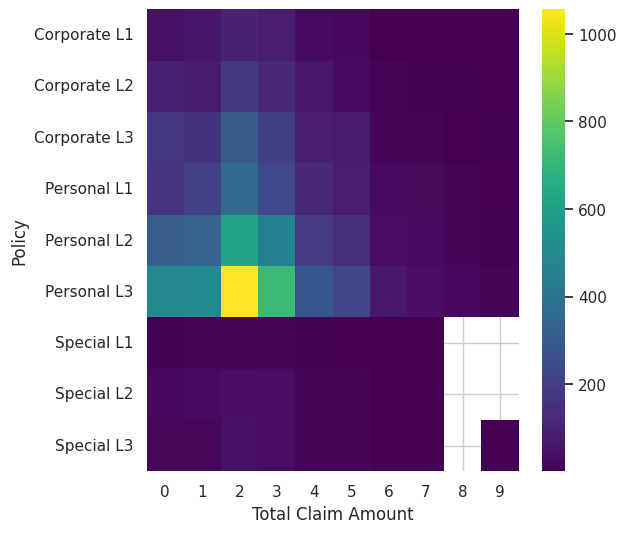

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy')

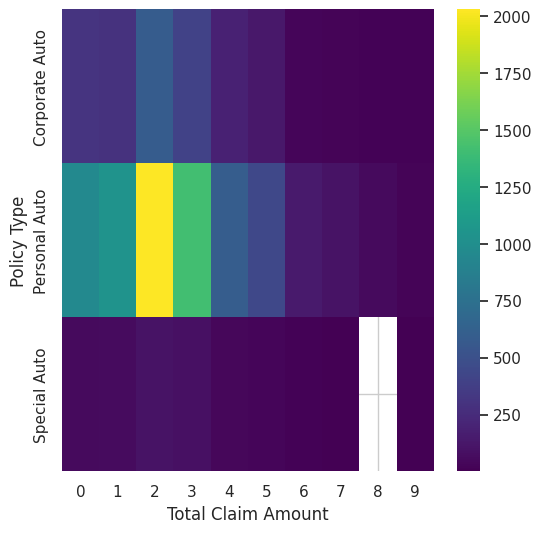

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Total Claim Amount Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Total Claim Amount')
_ = plt.ylabel('Policy Type')

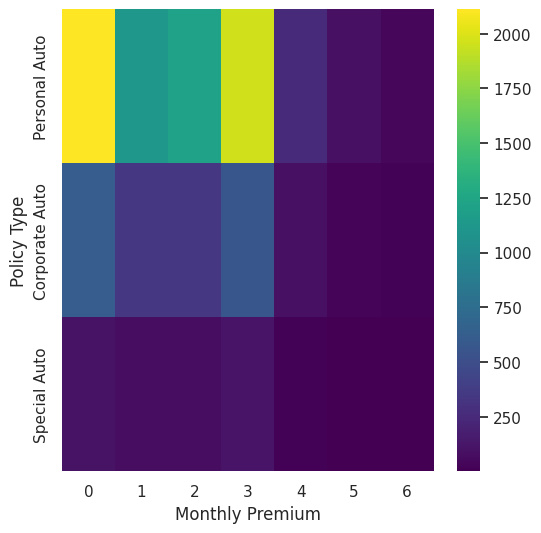

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy Type'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy Type')

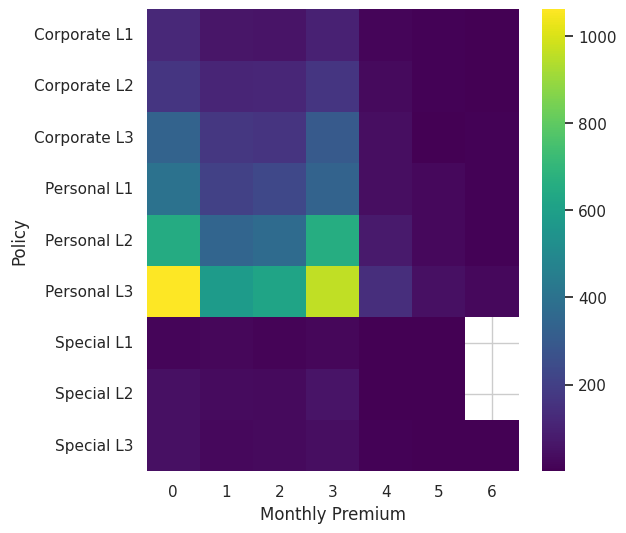

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Policy'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Policy')

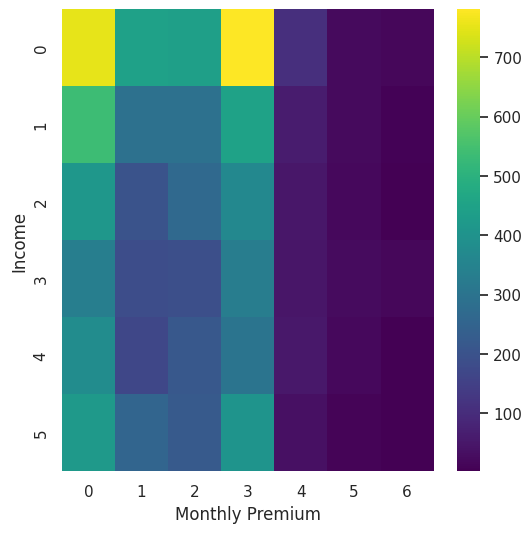

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Monthly Premium Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Premium')
_ = plt.ylabel('Income')

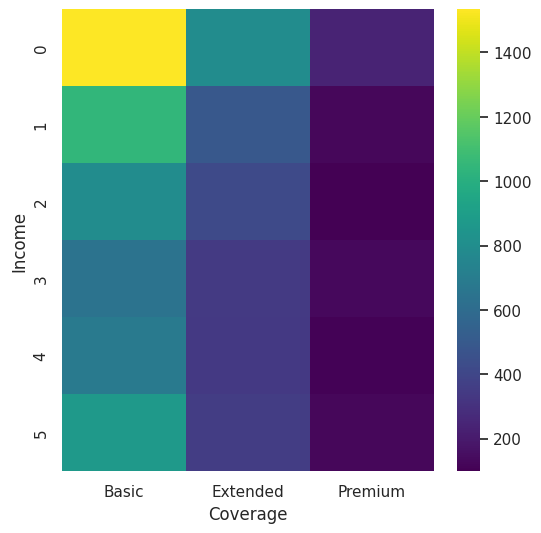

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Income Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Income')

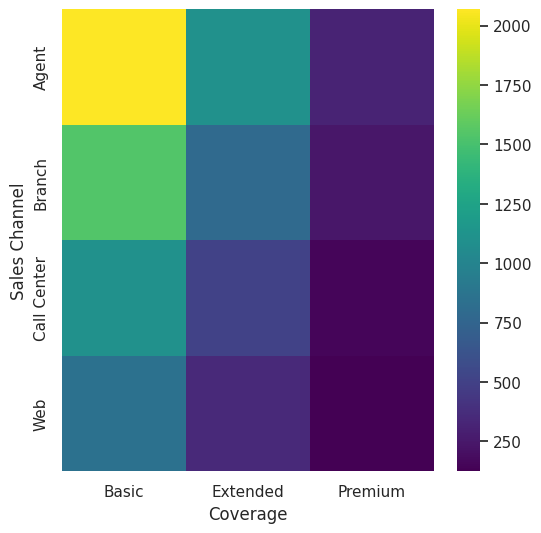

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Sales Channel'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Sales Channel')

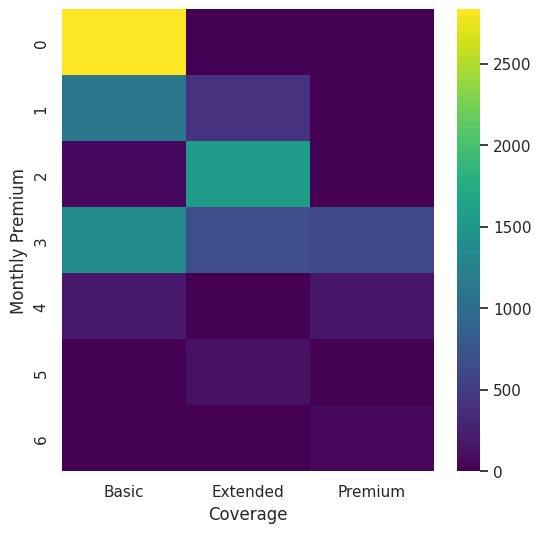

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Monthly Premium Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')
_ = plt.ylabel('Monthly Premium')

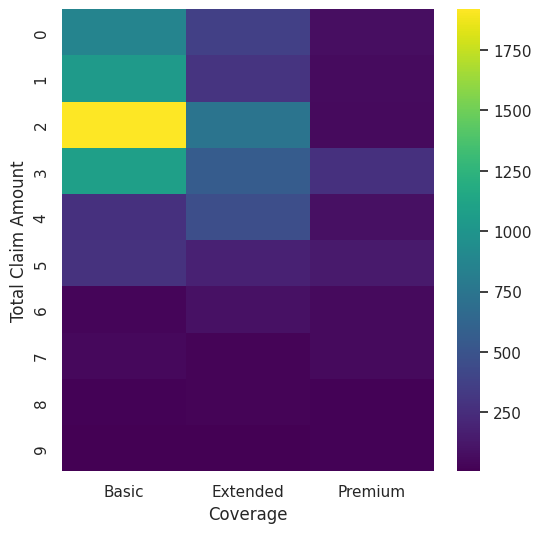

In [ ]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Total Claim Amount Category'].value_counts()
    for x_label, grp in df_new.groupby('Coverage')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Coverage')

_ = plt.ylabel('Total Claim Amount')

## Dimensionality Reduction

### 1) Principal Component Analysis

#### Finding the appropriate number of components for PCA using ***Elbow Method***

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])
pca = PCA()
pca.fit(df_scaled)

PCA()

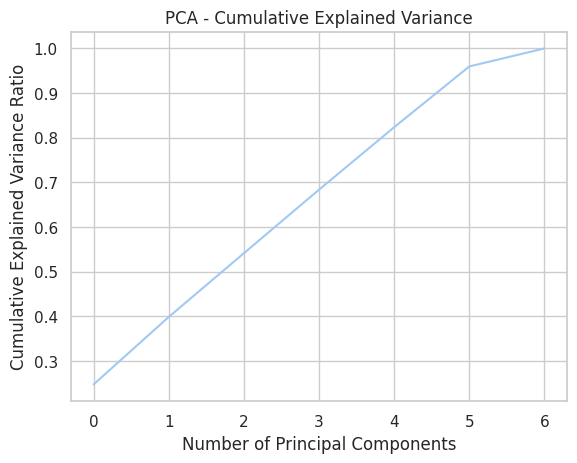

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

We will consider the number of components = 3 for the PCA of the numerical features.

In [ ]:
# Initialize PCA
pca = PCA(n_components=5)

# Fit PCA to the standardized data
pca.fit(df_scaled)

# Transform the data into the new feature space
df_pca = pca.transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Display the DataFrame with principal components
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5
0 -0.743364 -1.654475 -0.294265 -1.784279  0.276085
1  2.128287 -0.990163 -0.821634  2.017952 -0.053372
2  0.468835 -0.065729 -0.308743 -0.734216  0.420762
3  0.917910 -0.612331 -0.686405  1.708054 -0.468162
4 -1.141628  0.372408 -0.329233 -0.712626 -0.324881


#### Plotting the 3 Principal Components on a 3D plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

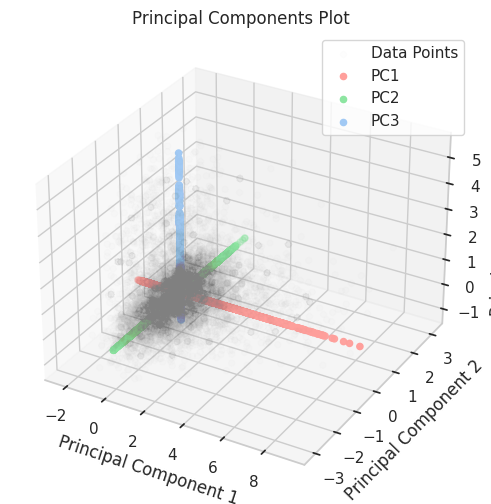

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
PC1 = df_pca['PC1']
PC2 = df_pca['PC2']
PC3 = df_pca['PC3']
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='gray', label='Data Points', marker='o', alpha = 0.01)
ax.scatter(PC1, np.zeros_like(PC1), np.zeros_like(PC1), c='r', label='PC1', marker='o')
ax.scatter(np.zeros_like(PC2), PC2, np.zeros_like(PC2), c='g', label='PC2', marker='o')
ax.scatter(np.zeros_like(PC3), np.zeros_like(PC3), PC3, c='b', label='PC3', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Principal Components Plot')
ax.legend()
plt.show()

### 2) t-distributed Stochastic Neighbor Embedding

In [ ]:
df_2 = pd.concat([df[numerical_columns], df_categorical_new], axis = 1)
df_2.head()

Income  Monthly Premium Auto  Months Since Last Claim  \
0   56274                    69                       32   
1       0                    94                       13   
2   48767                   108                       18   
3       0                   106                       18   
4   43836                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount       State Response  Coverage  ...  \
0                   1          384.811147  Washington       No     Basic  ...   
1                   8         1131.464935     Arizona       No  Extended  ...   
2                   2          566.472247      Nevada       No   Premium  ...   
3                   7          529.881344  California       No     Basic  ...   
4                   1          138.130879  Washington       No     Basic  ...   

  EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0         Employed      F      Suburban        Married  Corporate Auto   
1       Unemployed      F      Suburban         Single   Personal Auto   
2         Employed      F      Suburban        Married   Personal Auto   
3       Unemployed      M      Suburban        Married  Corporate Auto   
4         Employed      M         Rural         Single   Personal Auto   

         Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0  Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1   Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2   Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3  Corporate L2           Offer1   Call Center            SUV      Medsize  
4   Personal L1           Offer1         Agent  Four-Door Car      Medsize  

[5 rows x 21 columns]

In [ ]:
cat = df_categorical_new.columns.to_list()

In [ ]:
df_encode = pd.get_dummies(df_2, columns=cat)
df_encode.head()

Income  Monthly Premium Auto  Months Since Last Claim  \
0   56274                    69                       32   
1       0                    94                       13   
2   48767                   108                       18   
3       0                   106                       18   
4   43836                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  State_Arizona  State_California  \
0                   1          384.811147              0                 0   
1                   8         1131.464935              1                 0   
2                   2          566.472247              0                 0   
3                   7          529.881344              0                 1   
4                   1          138.130879              0                 0   

   State_Nevada  ...  Sales Channel_Web  Vehicle Class_Four-Door Car  \
0             0  ...                  0                            0   
1             0  ...                  0                            1   
2             1  ...                  0                            0   
3             0  ...                  0                            0   
4             0  ...                  0                            1   

   Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  0   
3                         0                         0                  1   
4                         0                         0                  0   

   Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  Vehicle Size_Large  \
0                         0                           1                   0   
1                         0                           0                   0   
2                         0                           1                   0   
3                         0                           0                   0   
4                         0                           0                   0   

   Vehicle Size_Medsize  Vehicle Size_Small  
0                     1                   0  
1                     1                   0  
2                     1                   0  
3                     1                   0  
4                     1                   0  

[5 rows x 64 columns]

In [ ]:
df_scaled_new = scaler.fit_transform(df_encode)
len(df_scaled_new[0,])

64

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=3, random_state=42)
df_tsne = tsne.fit_transform(df_scaled_new)

In [ ]:
df_tsne

array([[  6.909921  ,  19.652107  ,  18.937675  ],
       [ -5.19432   ,  -5.676584  , -26.048492  ],
       [  2.245857  ,   8.621856  ,   1.8450756 ],
       ...,
       [ 31.316889  ,  -1.5977327 ,  11.069189  ],
       [ -0.57735735,   2.3240817 ,  -9.127018  ],
       [ 20.695562  ,  20.392155  ,   9.265536  ]], dtype=float32)

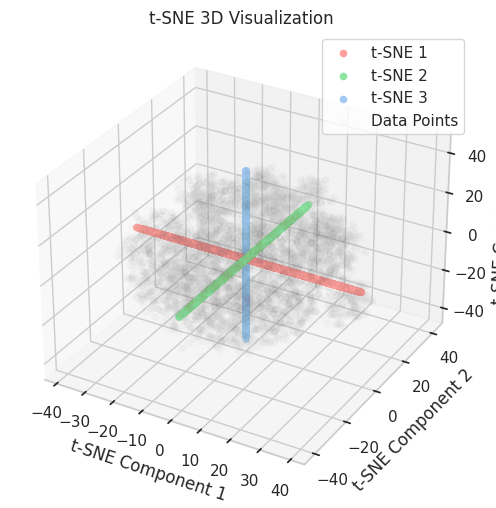

In [ ]:
# Visualize the results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
tsne1 = df_tsne[:, 0]
tsne2 = df_tsne[:, 1]
tsne3 = df_tsne[:, 2]
ax.scatter(tsne1, np.zeros_like(tsne1), np.zeros_like(tsne1), c='r', label='t-SNE 1', marker='o')
ax.scatter(np.zeros_like(tsne2), tsne2, np.zeros_like(tsne2), c='g', label='t-SNE 2', marker='o')
ax.scatter(np.zeros_like(tsne3), np.zeros_like(tsne3), tsne3, c='b', label='t-SNE 3', marker='o')
ax.scatter(tsne1, tsne2, tsne3, alpha=0.01, label='Data Points',c = 'gray')
ax.set_title('t-SNE 3D Visualization')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.show()

### Clustering Analysis

#### K-Means Clustering to find Customer Segmentation

We have the scaled and encoded dataset `df_scaled_new` to use for clustering.

Also, we have the number of clusters to be considered from the `Elbow Method` graph to be 3.

In [ ]:
from sklearn.cluster import KMeans

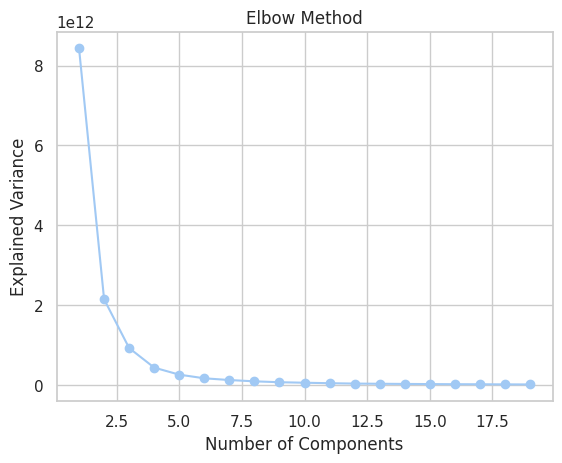

In [ ]:
exp_variance = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init = 'auto')
    kmeans.fit(df_encode)
    exp_variance.append(kmeans.inertia_)

plt.plot(range(1, 20), exp_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
clusters = kmeans.fit_predict(df_scaled_new)

In [ ]:
df['Cluster'] = clusters
cluster_centers = kmeans.cluster_centers_

In [ ]:
clusters

array([0, 1, 4, ..., 0, 4, 0], dtype=int32)

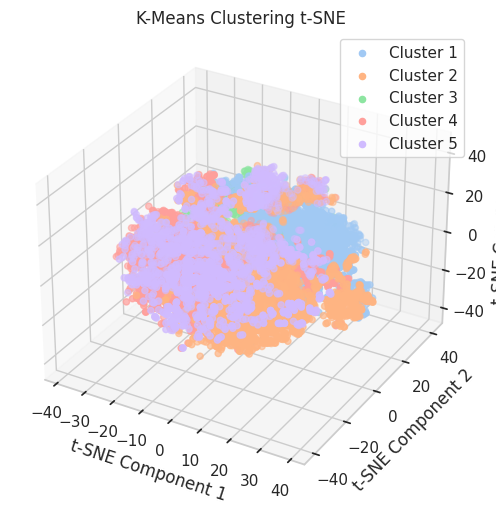

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    ax.scatter(df_tsne[clusters == cluster, 0],
               df_tsne[clusters == cluster, 1],
               df_tsne[clusters == cluster, 2],
               label=f'Cluster {cluster+1}')

ax.set_title('K-Means Clustering t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend()
plt.show()

In [ ]:
df_pca_new = np.array(df_pca)

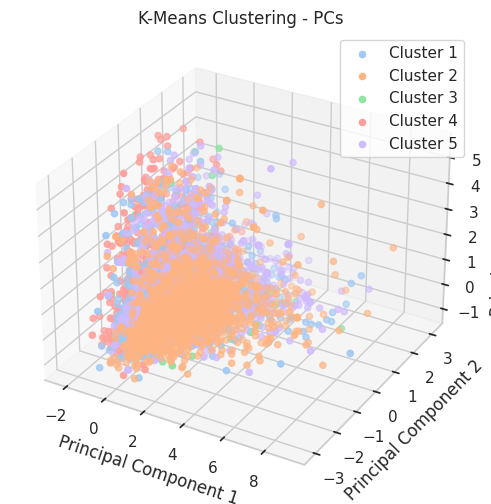

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    ax.scatter(df_pca_new[clusters == cluster, 0],
               df_pca_new[clusters == cluster, 1],
               df_pca_new[clusters == cluster, 2],
               label=f'Cluster {cluster+1}')

ax.set_title('K-Means Clustering - PCs')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

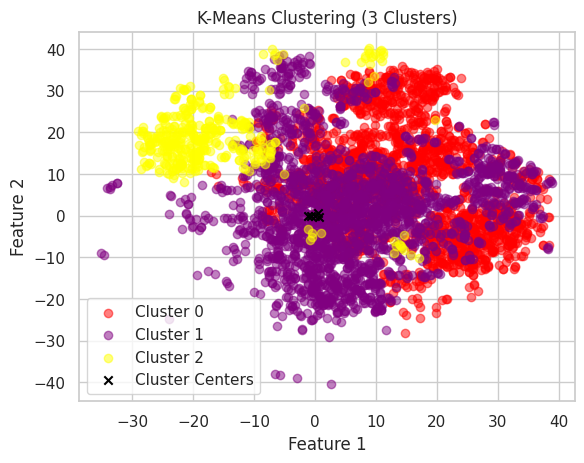

In [ ]:
# Scatter plot for cluster 0
plt.scatter(df_tsne[clusters == 0, 0], df_tsne[clusters == 0, 1], c='red', label='Cluster 0', alpha=0.5)

# Scatter plot for cluster 1
plt.scatter(df_tsne[clusters == 1, 0], df_tsne[clusters  == 1, 1], c='purple', label='Cluster 1', alpha=0.5)

# Scatter plot for cluster 2
plt.scatter(df_tsne[clusters  == 2, 0], df_tsne[clusters  == 2, 1], c='yellow', label='Cluster 2', alpha=0.5)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', label='Cluster Centers')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import numpy as np

In [ ]:
# perplexity = np.arange(50, 200, 20)
# divergence = []

# for i in perplexity:
#     model = TSNE(n_components=3, init='pca', perplexity=i)
#     reduced = model.fit_transform(df_encode)
#     divergence.append(model.kl_divergence_)
# fig = px.line(x=perplexity, y=divergence, markers=True)
# fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
# fig.update_traces(line_color="red", line_width=1)
# fig.show()

#### Customer Segmentation

In [ ]:
# plt.figure(figsize = (6,6))
# labels = ["Segment 1", "Segment 2", "Segment 3","Segment 4", "Segment 5"]
# plt.hist(df['Cluster'], bins = 5, label = labels)
# #bins = 3
# plt.xticks(ticks = [0,1,2,3,4],labels = labels)
# plt.title("Customer Segmentation")
# plt.xlabel("Customer Segments")
# plt.ylabel("Number of Customers")
# plt.show()

#### Evaluating K-Means Clustering

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_score = silhouette_score(df_tsne, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.042472932


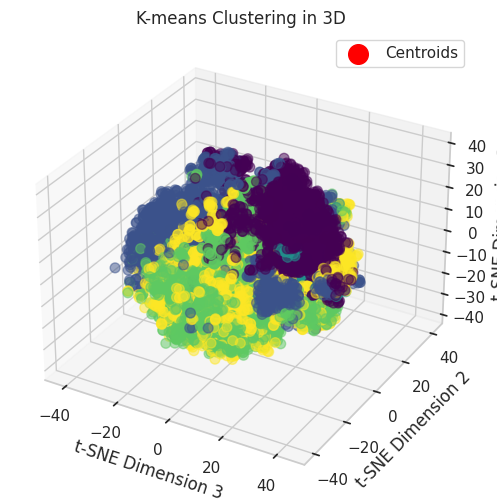

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df_tsne[:, 2], df_tsne[:, 1], df_tsne[:, 0], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)

# Plot cluster centroids
ax.scatter( cluster_centers[:, 2], cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='o', s=200, label='Centroids', alpha = 1)

ax.set_xlabel('t-SNE Dimension 3')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 1')
ax.set_title('K-means Clustering in 3D')
plt.legend()
plt.show()

### Feature Importance Analysis

#### 1) Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rfe = RFE(estimator=rf, n_features_to_select=3)
rfe.fit(df_encode, df['Customer Lifetime Value'])

RFE(estimator=RandomForestRegressor(), n_features_to_select=3)

In [ ]:
# Get the selected features
selected_features_rfe = df_encode.columns[rfe.support_]
print("Selected features using RFE:")
print(selected_features_rfe)

Selected features using RFE:
Index(['Monthly Premium Auto', 'Number of Policies', 'Total Claim Amount'], dtype='object')


#### 2) Feature Importance using Random Forest

In [ ]:
# Fit the Random Forest model to the data
rf.fit(df_encode, df['Customer Lifetime Value'])
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Get the names of the top features
top_features_rf = df_encode.columns[indices]
print("Top features and their importances using Random Forest:")
for i in range(len(top_features_rf)):
    print(f"{top_features_rf[i]}: {feature_importances[indices[i]]}")

Top features and their importances using Random Forest:
Number of Policies: 0.4694852600509087
Monthly Premium Auto: 0.24608536145618307
Months Since Last Claim: 0.03929100614673893
Total Claim Amount: 0.03648439636622443
Months Since Policy Inception: 0.0356449584308389
Income: 0.02882282963822059
Number of Open Complaints: 0.0065344546125064495
Education_High School or Below: 0.004570191085104597
Sales Channel_Branch: 0.004293391875388191
Education_Bachelor: 0.004190371679700883
Renew Offer Type_Offer2: 0.004148088947994762
Education_College: 0.0038730493428298083
Sales Channel_Agent: 0.003863797044846886
Coverage_Basic: 0.0035147289176773533
Policy_Personal L3: 0.003379426928233139
Renew Offer Type_Offer1: 0.003288268993474315
Sales Channel_Call Center: 0.003265410583353315
Policy_Personal L2: 0.003264171518305979
Response_No: 0.003177051726728604
Renew Offer Type_Offer4: 0.0031267802555874358
Vehicle Size_Large: 0.0030469653996978694
Marital Status_Married: 0.0030166112066749447
Ve

In [ ]:
rf = RandomForestRegressor()
# Fit the Random Forest model to the data
rf.fit(df_encode, df['Customer Lifetime Value'])
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Get the names of the top features
top_features_rf = df_encode.columns[indices]
print("Top features using Random Forest:")
for i in range(1,11):
    print(top_features_rf[i])

Top features using Random Forest:
Monthly Premium Auto
Months Since Last Claim
Total Claim Amount
Months Since Policy Inception
Income
Number of Open Complaints
Renew Offer Type_Offer2
Sales Channel_Branch
Education_High School or Below
Sales Channel_Agent


hierarchical clustering


In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'CLV Category', 'Income Category',
       'Monthly Premium Category', 'Total Claim Amount Category', 'Cluster'],
      dtype='object')

In [ ]:
df.shape

(9134, 29)

In [ ]:
before_dummy = df_categorical.drop(columns=['Customer'])

In [ ]:
before_dummy.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
one_hot_encoded_df = pd.get_dummies(df, columns=['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status','Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class','Vehicle Size'])

In [ ]:
one_hot_encoded_df.columns

Index(['Customer', 'Customer Lifetime Value', 'Effective To Date', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'CLV Category',
       'Income Category', 'Monthly Premium Category',
       'Total Claim Amount Category', 'Cluster', 'State_Arizona',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'Response_No', 'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_F',
       'Gender_M', 'Location Code_Rural', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Divo

In [ ]:
one_hot_encoded_df.head()

Customer  Customer Lifetime Value Effective To Date  Income  \
0  BU79786              2763.519279        2011-02-24   56274   
1  QZ44356              6979.535903        2011-01-31       0   
2  AI49188             12887.431650        2011-02-19   48767   
3  WW63253              7645.861827        2011-01-20       0   
4  HB64268              2813.692575        2011-02-03   43836   

   Monthly Premium Auto  Months Since Last Claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  ... Sales Channel_Web  \
0                   1          384.811147  ...                 0   
1                   8         1131.464935  ...                 0   
2                   2          566.472247  ...                 0   
3                   7          529.881344  ...                 0   
4                   1          138.130879  ...                 0   

  Vehicle Class_Four-Door Car Vehicle Class_Luxury Car  \
0                           0                        0   
1                           1                        0   
2                           0                        0   
3                           0                        0   
4                           1                        0   

  Vehicle Class_Luxury SUV  Vehicle Class_SUV  Vehicle Class_Sports Car  \
0                        0                  0                         0   
1                        0                  0                         0   
2                        0                  0                         0   
3                        0                  1                         0   
4                        0                  0                         0   

   Vehicle Class_Two-Door Car  Vehicle Size_Large  Vehicle Size_Medsize  \
0                           1                   0                     1   
1                           0                   0                     1   
2                           1                   0                     1   
3                           0                   0                     1   
4                           0                   0                     1   

   Vehicle Size_Small  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 72 columns]

In [ ]:
one_hot_encoded_df.drop(columns=['Customer','Effective To Date'],inplace=True)

In [ ]:
X =one_hot_encoded_df.drop(columns=['Customer Lifetime Value'])

In [ ]:
X.columns

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'CLV Category',
       'Income Category', 'Monthly Premium Category',
       'Total Claim Amount Category', 'Cluster', 'State_Arizona',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'Response_No', 'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_F',
       'Gender_M', 'Location Code_Rural', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
  

In [ ]:
X.shape

(9134, 69)

In [ ]:
y= one_hot_encoded_df['Customer Lifetime Value']

In [ ]:
# to split data set
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


# to build models
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# to evaluate models
from sklearn.metrics import mean_squared_error


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=1)


In [ ]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Customer Lifetime Value         9134 non-null   float64 
 1   Income                          9134 non-null   int64   
 2   Monthly Premium Auto            9134 non-null   int64   
 3   Months Since Last Claim         9134 non-null   int64   
 4   Months Since Policy Inception   9134 non-null   int64   
 5   Number of Open Complaints       9134 non-null   int64   
 6   Number of Policies              9134 non-null   int64   
 7   Total Claim Amount              9134 non-null   float64 
 8   CLV Category                    9134 non-null   category
 9   Income Category                 9134 non-null   category
 10  Monthly Premium Category        9134 non-null   category
 11  Total Claim Amount Category     9134 non-null   category
 12  Cluster             

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit the GLM with Gamma distribution
glm_gamma = sm.GLM(y_train, X_train, family=sm.families.Gamma())
glm_results = glm_gamma.fit()

# Predict on test data
y_pred = glm_results.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Summary of GLM results
print(glm_results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Mean Squared Error: 26467829221.380924
                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7253
Model Family:                        Gamma   Df Model:                           53
Link Function:                InversePower   Scale:                        0.096218
Method:                               IRLS   Log-Likelihood:                -87655.
Date:                     Wed, 27 Mar 2024   Deviance:                       4794.4
Time:                             16:38:32   Pearson chi2:                     698.
No. Iterations:                         13   Pseudo R-squ. (CS):             -6.307
Covariance Type:                 nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit the GLM with Gamma distribution and A log link fiunction

glm_gamma_log = sm.GLM(y_train, X_train, family=sm.families.Gamma(sm.families.links.log()))
glm_results_log = glm_gamma_log.fit()

# Predict on test data
y_pred = glm_results_log.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Summary of GLM results
print(glm_results_log.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Mean Squared Error: 3304518.574524308
                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7253
Model Family:                        Gamma   Df Model:                           53
Link Function:                         log   Scale:                        0.023007
Method:                               IRLS   Log-Likelihood:                -60544.
Date:                     Wed, 27 Mar 2024   Deviance:                       167.62
Time:                             16:38:32   Pearson chi2:                     167.
No. Iterations:                         12   Pseudo R-squ. (CS):              1.000
Covariance Type:                 nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Fit the model on training data
gbr.fit(X_train, y_train)

# Predict on test data
y_pred = gbr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1495498.0197137764


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1251615.099416677


In [ ]:
imp_features = ["Customer Lifetime Value","Monthly Premium Auto", "Months Since Last Claim","Total Claim Amount",
                "Months Since Policy Inception","Income","Number of Open Complaints",
                "Renew Offer Type","Sales Channel","Education","Coverage","Location Code","State","Vehicle Size","EmploymentStatus","Gender"
                ]
df_imp = df[imp_features]

In [ ]:
df_imp.head()

Customer Lifetime Value  Monthly Premium Auto  Months Since Last Claim  \
0              2763.519279                    69                       32   
1              6979.535903                    94                       13   
2             12887.431650                   108                       18   
3              7645.861827                   106                       18   
4              2813.692575                    73                       12   

   Total Claim Amount  Months Since Policy Inception  Income  \
0          384.811147                              5   56274   
1         1131.464935                             42       0   
2          566.472247                             38   48767   
3          529.881344                             65       0   
4          138.130879                             44   43836   

   Number of Open Complaints Renew Offer Type Sales Channel Education  \
0                          0           Offer1         Agent  Bachelor   
1                          0           Offer3         Agent  Bachelor   
2                          0           Offer1         Agent  Bachelor   
3                          0           Offer1   Call Center  Bachelor   
4                          0           Offer1         Agent  Bachelor   

   Coverage Location Code       State Vehicle Size EmploymentStatus Gender  
0     Basic      Suburban  Washington      Medsize         Employed      F  
1  Extended      Suburban     Arizona      Medsize       Unemployed      F  
2   Premium      Suburban      Nevada      Medsize         Employed      F  
3     Basic      Suburban  California      Medsize       Unemployed      M  
4     Basic         Rural  Washington      Medsize         Employed      M

In [ ]:
df_imp.select_dtypes(include=['object'])

Renew Offer Type Sales Channel Education  Coverage Location Code  \
0              Offer1         Agent  Bachelor     Basic      Suburban   
1              Offer3         Agent  Bachelor  Extended      Suburban   
2              Offer1         Agent  Bachelor   Premium      Suburban   
3              Offer1   Call Center  Bachelor     Basic      Suburban   
4              Offer1         Agent  Bachelor     Basic         Rural   
...               ...           ...       ...       ...           ...   
9129           Offer2           Web  Bachelor     Basic         Urban   
9130           Offer1        Branch   College  Extended      Suburban   
9131           Offer1        Branch  Bachelor  Extended      Suburban   
9132           Offer3        Branch   College  Extended      Suburban   
9133           Offer4   Call Center   College  Extended      Suburban   

           State Vehicle Size EmploymentStatus Gender  
0     Washington      Medsize         Employed      F  
1        Arizona      Medsize       Unemployed      F  
2         Nevada      Medsize         Employed      F  
3     California      Medsize       Unemployed      M  
4     Washington      Medsize         Employed      M  
...          ...          ...              ...    ...  
9129  California      Medsize         Employed      M  
9130  California      Medsize         Employed      F  
9131  California      Medsize       Unemployed      M  
9132  California        Large         Employed      M  
9133  California      Medsize       Unemployed      M  

[9134 rows x 9 columns]

In [ ]:
# df_one_hot = df_imp
df_one_hot = pd.get_dummies(df_imp, columns = ['Renew Offer Type', 'Sales Channel', 'Education', 'Coverage', 'Location Code',
                                               'State', 'Vehicle Size','EmploymentStatus', 'Gender'])
df_one_hot.head()

Customer Lifetime Value  Monthly Premium Auto  Months Since Last Claim  \
0              2763.519279                    69                       32   
1              6979.535903                    94                       13   
2             12887.431650                   108                       18   
3              7645.861827                   106                       18   
4              2813.692575                    73                       12   

   Total Claim Amount  Months Since Policy Inception  Income  \
0          384.811147                              5   56274   
1         1131.464935                             42       0   
2          566.472247                             38   48767   
3          529.881344                             65       0   
4          138.130879                             44   43836   

   Number of Open Complaints  Renew Offer Type_Offer1  \
0                          0                        1   
1                          0                        0   
2                          0                        1   
3                          0                        1   
4                          0                        1   

   Renew Offer Type_Offer2  Renew Offer Type_Offer3  ...  Vehicle Size_Large  \
0                        0                        0  ...                   0   
1                        0                        1  ...                   0   
2                        0                        0  ...                   0   
3                        0                        0  ...                   0   
4                        0                        0  ...                   0   

   Vehicle Size_Medsize  Vehicle Size_Small  EmploymentStatus_Disabled  \
0                     1                   0                          0   
1                     1                   0                          0   
2                     1                   0                          0   
3                     1                   0                          0   
4                     1                   0                          0   

   EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
0                          1                               0   
1                          0                               0   
2                          1                               0   
3                          0                               0   
4                          1                               0   

   EmploymentStatus_Retired  EmploymentStatus_Unemployed  Gender_F  Gender_M  
0                         0                            0         1         0  
1                         0                            1         1         0  
2                         0                            0         1         0  
3                         0                            1         0         1  
4                         0                            0         0         1  

[5 rows x 41 columns]

In [ ]:
X1 = df_one_hot.drop(columns = 'Customer Lifetime Value')
X1.head()

Monthly Premium Auto  Months Since Last Claim  Total Claim Amount  \
0                    69                       32          384.811147   
1                    94                       13         1131.464935   
2                   108                       18          566.472247   
3                   106                       18          529.881344   
4                    73                       12          138.130879   

   Months Since Policy Inception  Income  Number of Open Complaints  \
0                              5   56274                          0   
1                             42       0                          0   
2                             38   48767                          0   
3                             65       0                          0   
4                             44   43836                          0   

   Renew Offer Type_Offer1  Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
0                        1                        0                        0   
1                        0                        0                        1   
2                        1                        0                        0   
3                        1                        0                        0   
4                        1                        0                        0   

   Renew Offer Type_Offer4  ...  Vehicle Size_Large  Vehicle Size_Medsize  \
0                        0  ...                   0                     1   
1                        0  ...                   0                     1   
2                        0  ...                   0                     1   
3                        0  ...                   0                     1   
4                        0  ...                   0                     1   

   Vehicle Size_Small  EmploymentStatus_Disabled  EmploymentStatus_Employed  \
0                   0                          0                          1   
1                   0                          0                          0   
2                   0                          0                          1   
3                   0                          0                          0   
4                   0                          0                          1   

   EmploymentStatus_Medical Leave  EmploymentStatus_Retired  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   

   EmploymentStatus_Unemployed  Gender_F  Gender_M  
0                            0         1         0  
1                            1         1         0  
2                            0         1         0  
3                            1         0         1  
4                            0         0         1  

[5 rows x 40 columns]

In [ ]:
y1 = df_one_hot['Customer Lifetime Value']
y1.head()

0     2763.519279
1     6979.535903
2    12887.431650
3     7645.861827
4     2813.692575
Name: Customer Lifetime Value, dtype: float64

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.20,random_state=1)

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Fit the GLM with Gamma distribution and A log link fiunction

glm_gamma_log1 = sm.GLM(y_train1, X_train1, family=sm.families.Gamma(sm.families.links.log()))
glm_results_log1 = glm_gamma_log1.fit()

# Predict on test data
y_pred1 = glm_results_log1.predict(X_test1)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error:", mse)

# Summary of GLM results
print(glm_results_log1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Mean Squared Error: 39470515.50522548
                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7275
Model Family:                        Gamma   Df Model:                           31
Link Function:                         log   Scale:                         0.56857
Method:                               IRLS   Log-Likelihood:                -71411.
Date:                     Wed, 27 Mar 2024   Deviance:                       2801.3
Time:                             16:38:46   Pearson chi2:                 4.14e+03
No. Iterations:                         13   Pseudo R-squ. (CS):             0.1559
Covariance Type:                 nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------